# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [1]:
# if plotnine is not installed in Jupter then use the following command to install it 
!pip install plotnine

Running this project require the following imports 

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs, load_iris
from sklearn.metrics.pairwise import cosine_similarity
import sklearn.preprocessing as prep
from sklearn.neighbors import NearestNeighbors,DistanceMetric
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, pairwise_distances
from scipy.stats import multivariate_normal
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from plotnine import *
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)
            
            
            
            # StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



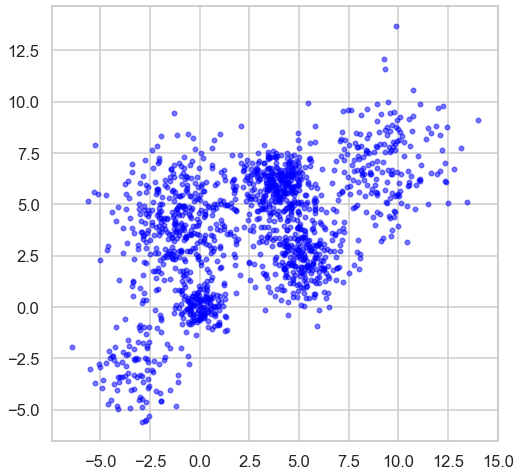

In [4]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

In [5]:


n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
y_pred = kmeans.fit_predict(Multi_blob_Data)

In [6]:


plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")


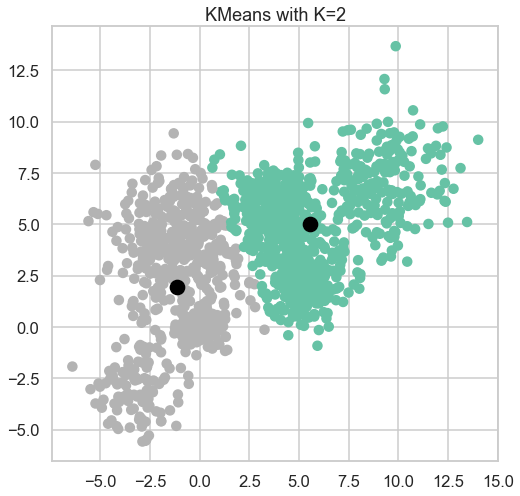

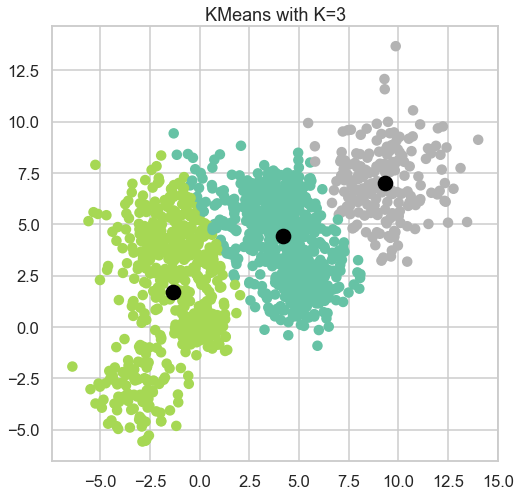

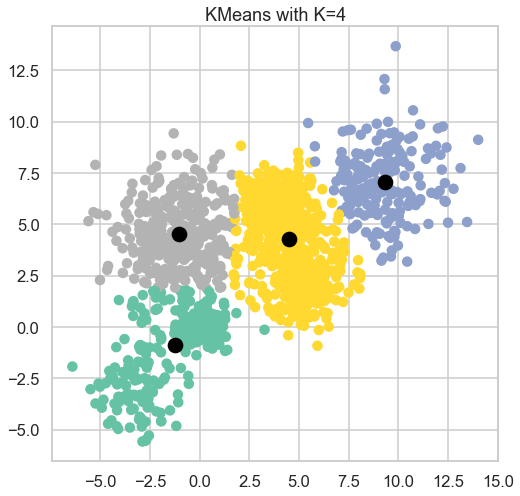

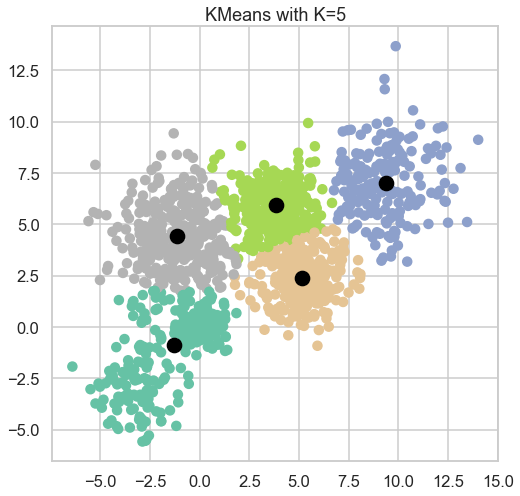

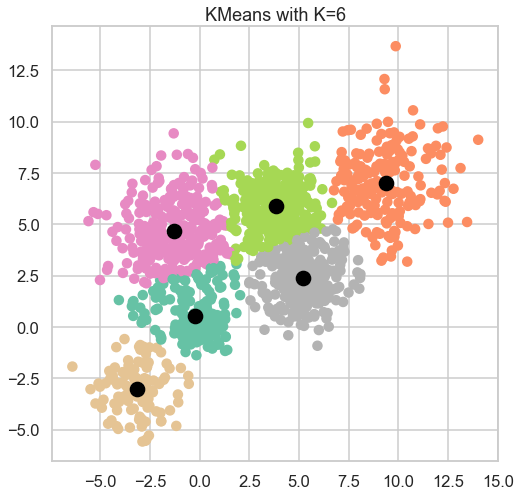

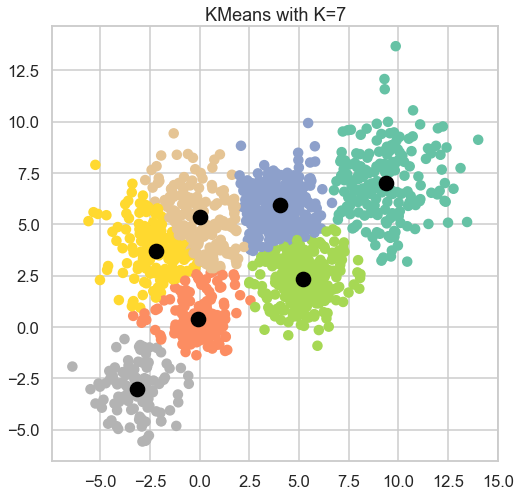

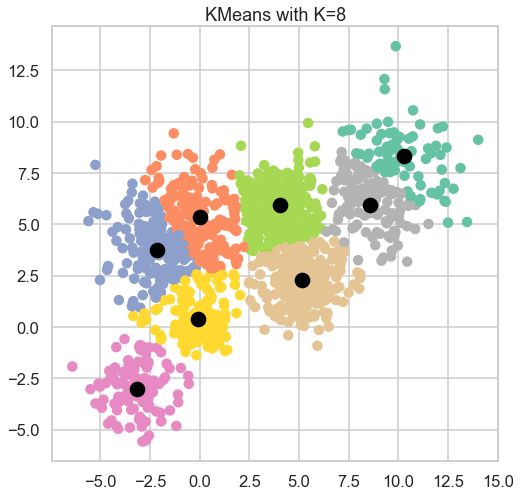

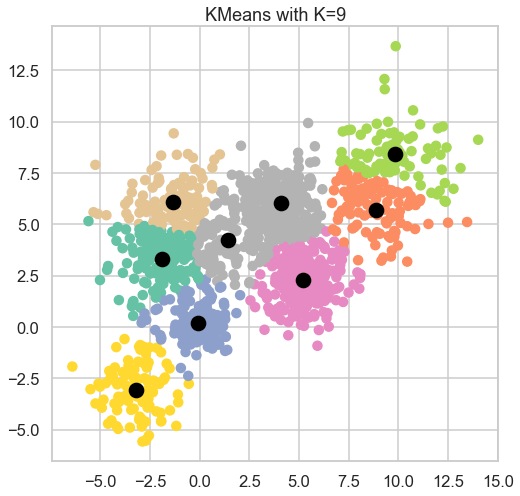

In [7]:

# Create a list of different values of K
Ks = range(2, 10)

# Initialize an empty list to store the distortion values for each value of K
distortions = []

# Initialize an empty list to store the silhouette scores for each value of K
silhouette_scores = []

# Loop over the different values of K
for K in Ks:
    # Initialize KMeans with the current value of K
    kmeans = KMeans(n_clusters=K, random_state=42)
    
    # Fit KMeans to the data
    kmeans.fit(Multi_blob_Data)
    
    # Append the distortion value to the list
    distortions.append(kmeans.inertia_)
    
    # Calculate the silhouette score and append it to the list
    score = silhouette_score(Multi_blob_Data, kmeans.labels_)
    silhouette_scores.append(score)
    
    # Plot the clustering results for the current value of K
    plt.figure()
    plt.title("KMeans with K={}".format(K))
    plt.scatter(Multi_blob_Data[:,0], Multi_blob_Data[:,1], c=kmeans.labels_, cmap="Set2")
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='o', s=200, color='black')
    plt.show()

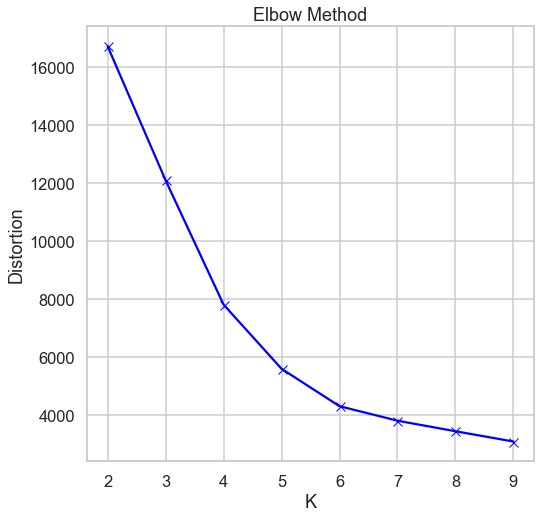

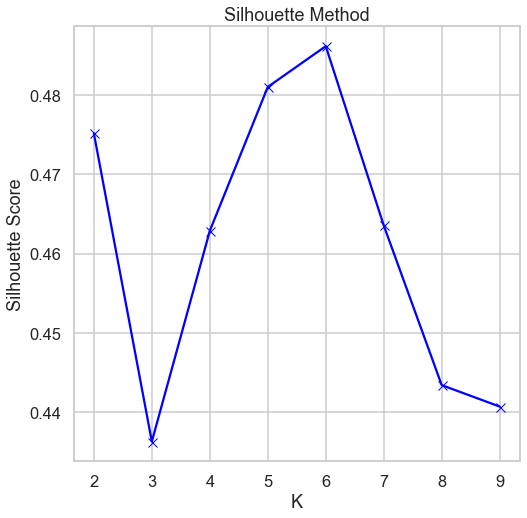

In [8]:
plt.plot(Ks, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

plt.plot(Ks, silhouette_scores, 'bx-')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

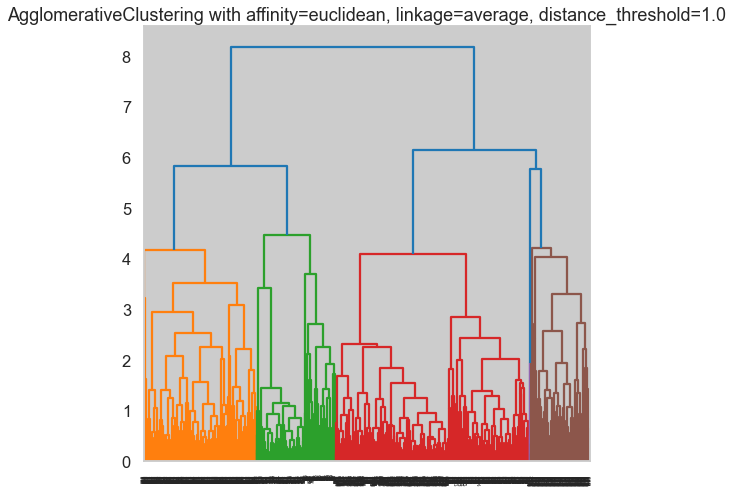

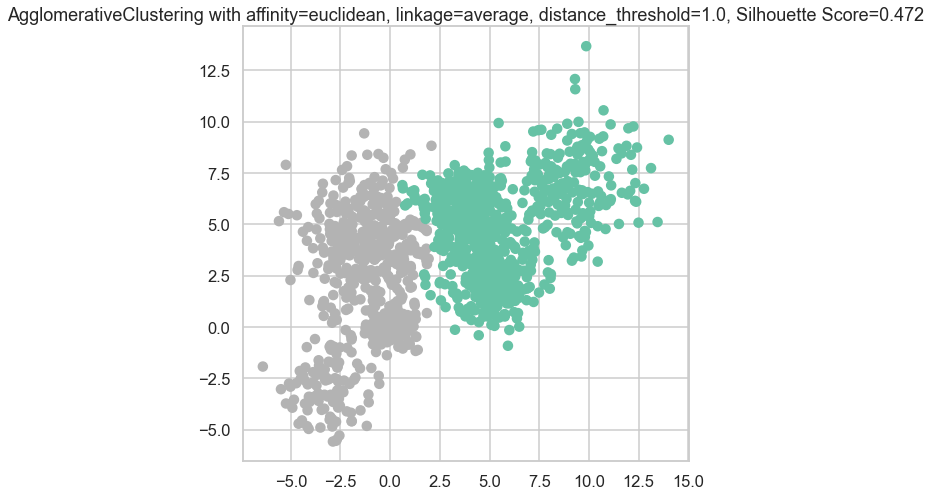

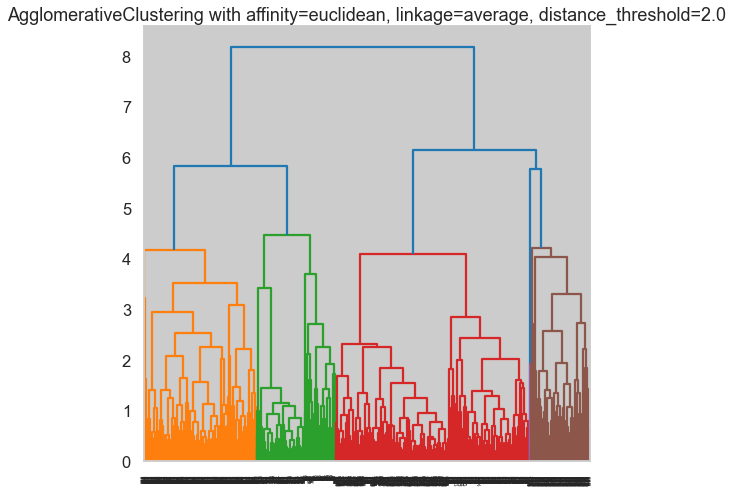

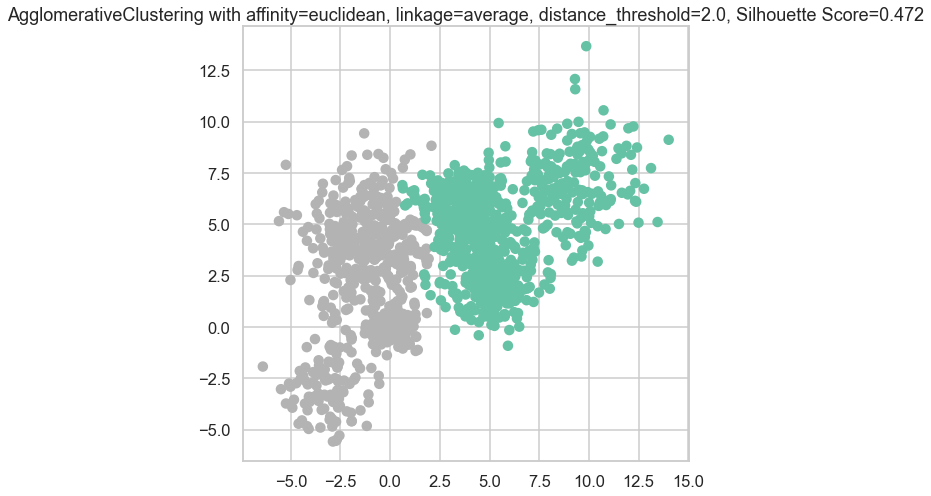

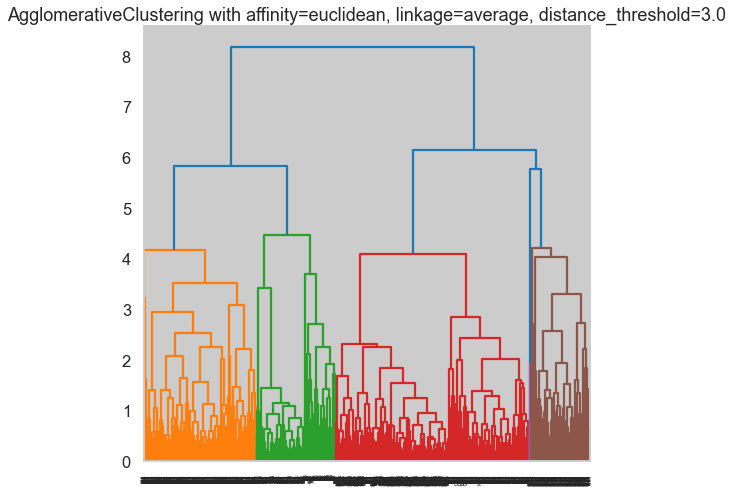

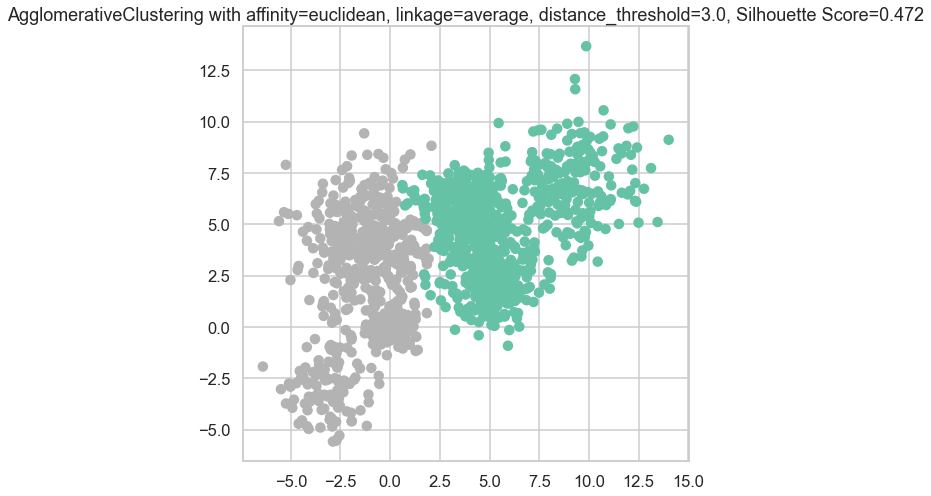

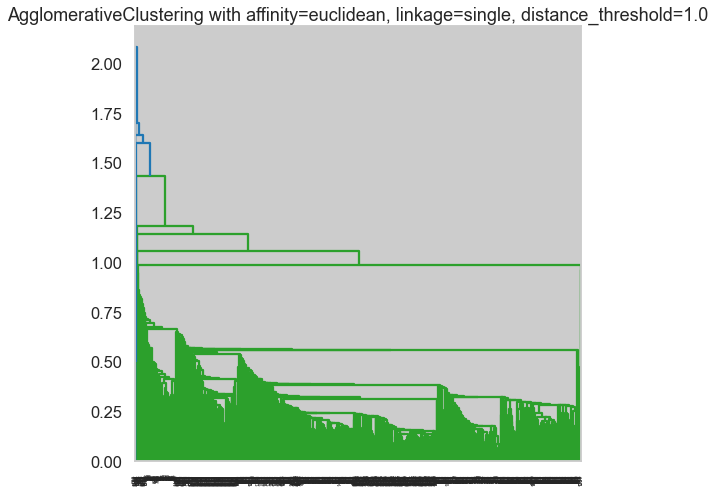

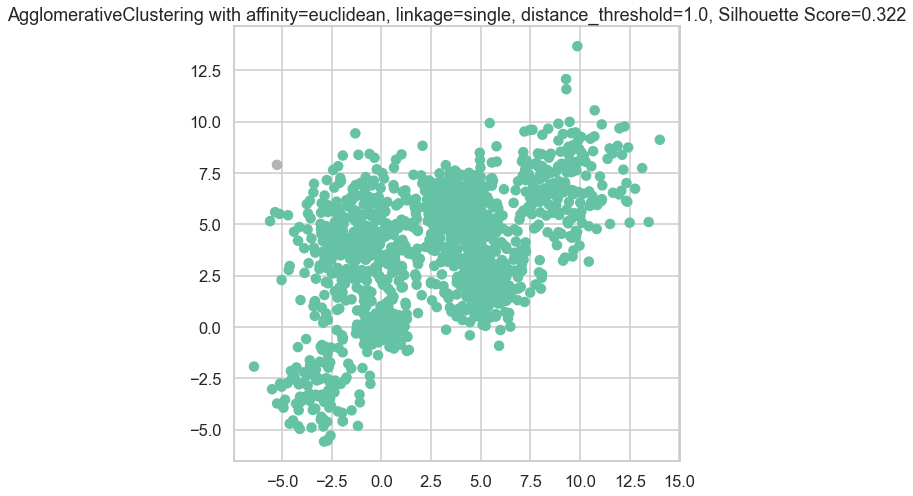

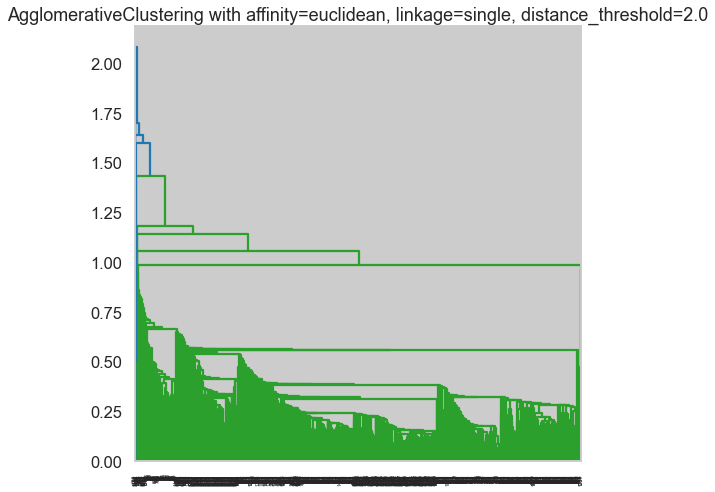

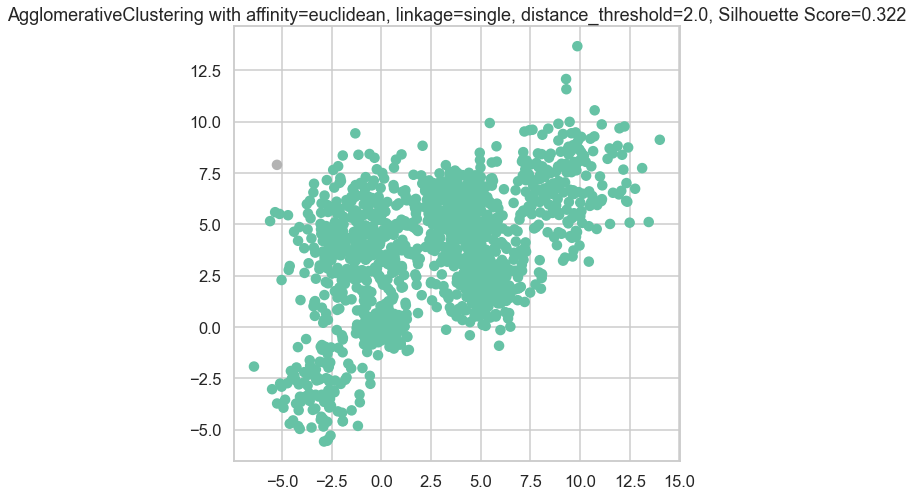

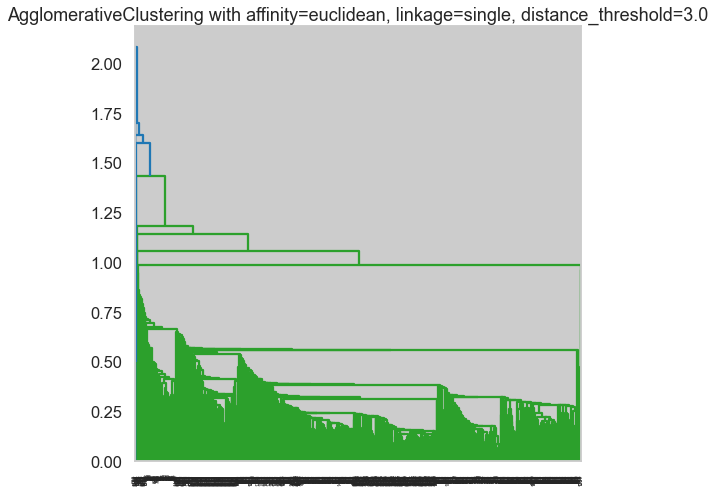

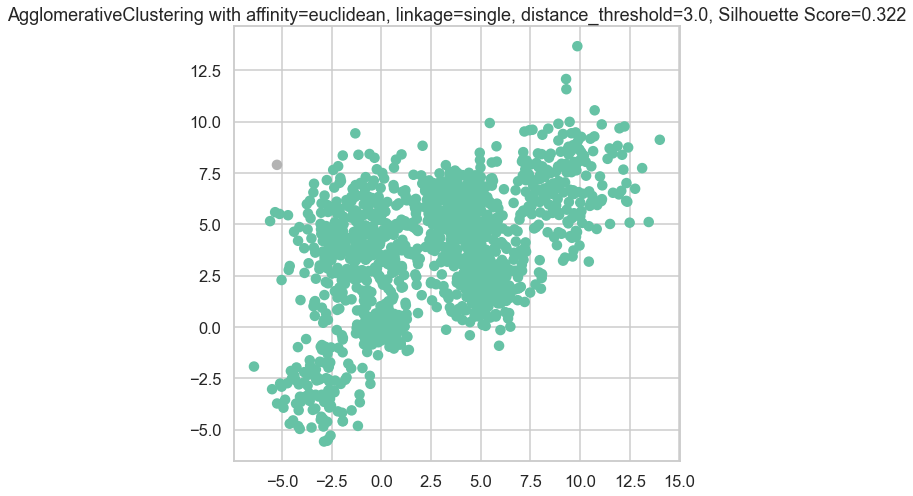

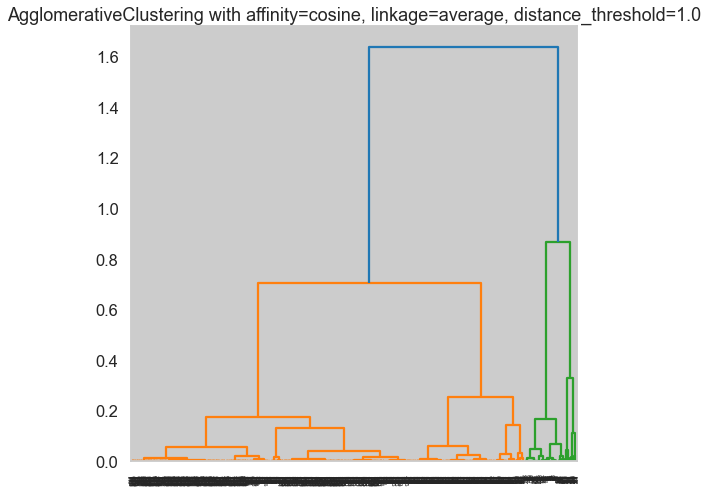

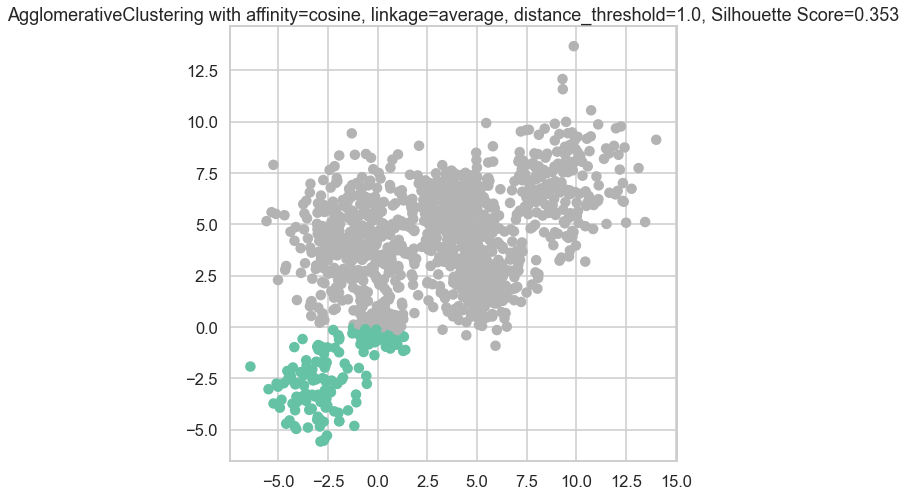

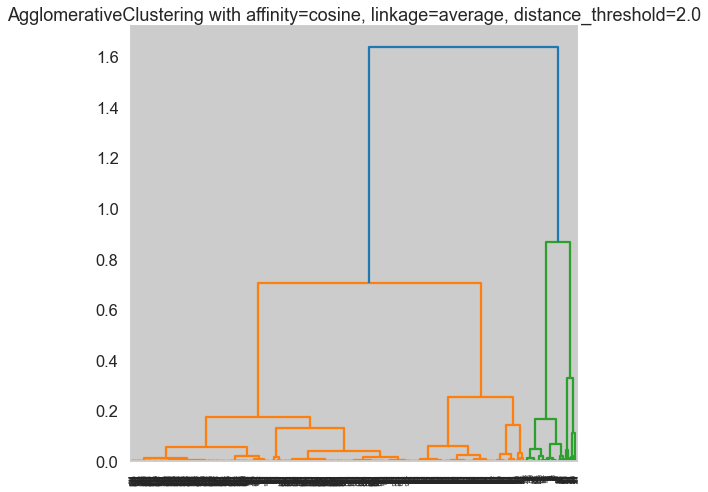

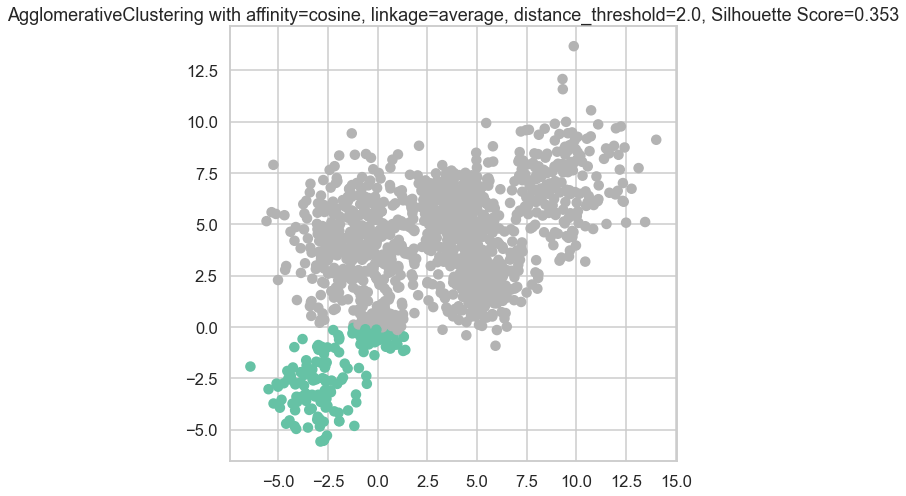

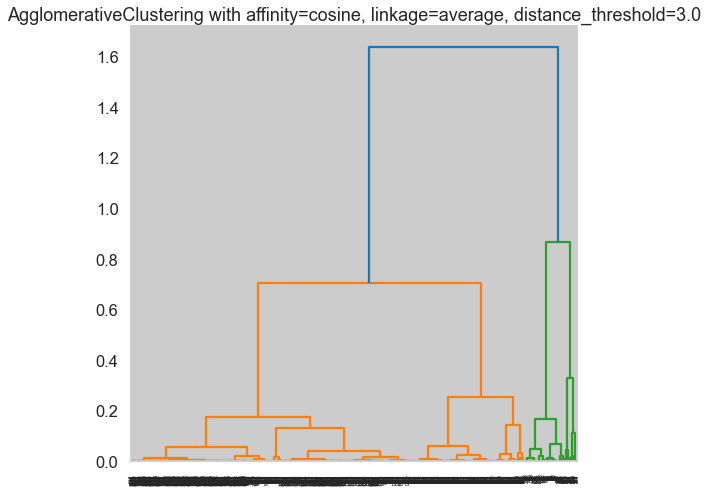

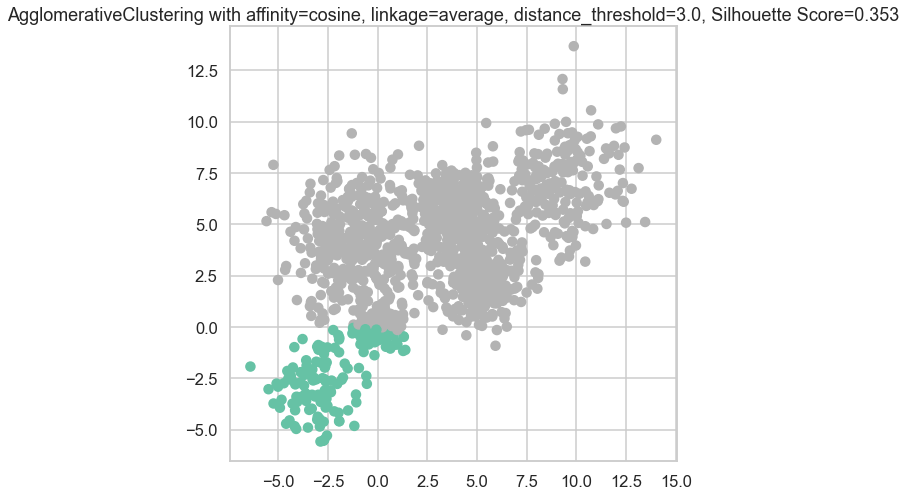

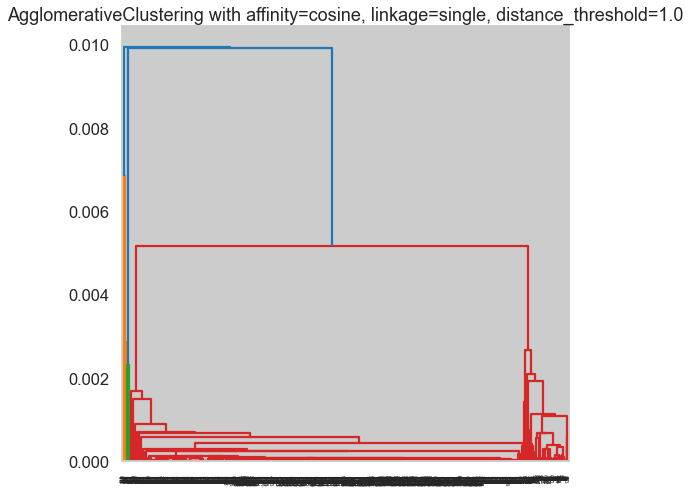

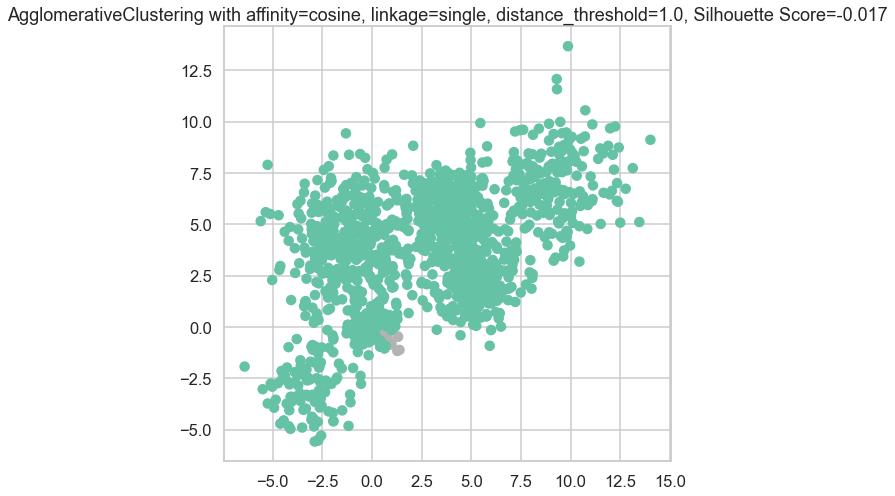

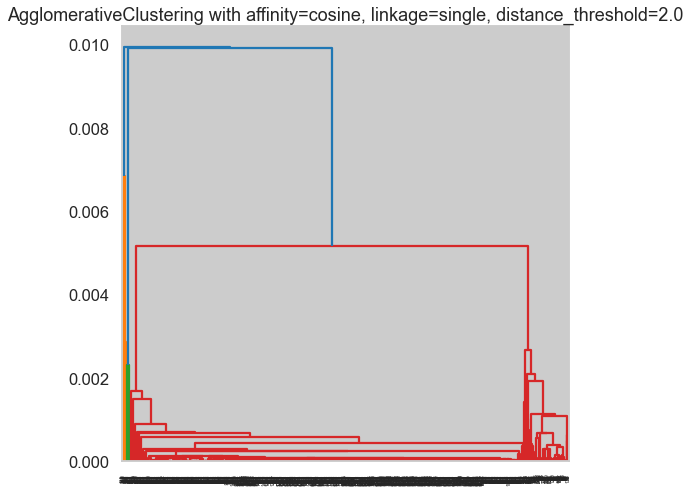

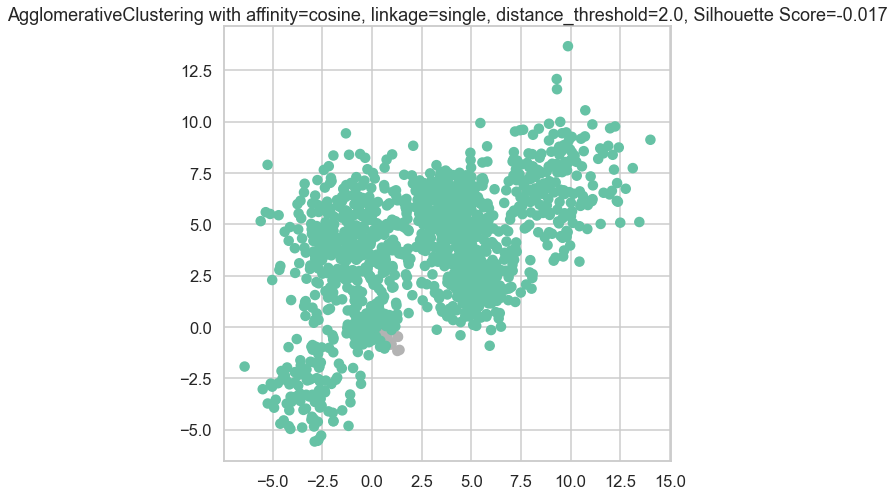

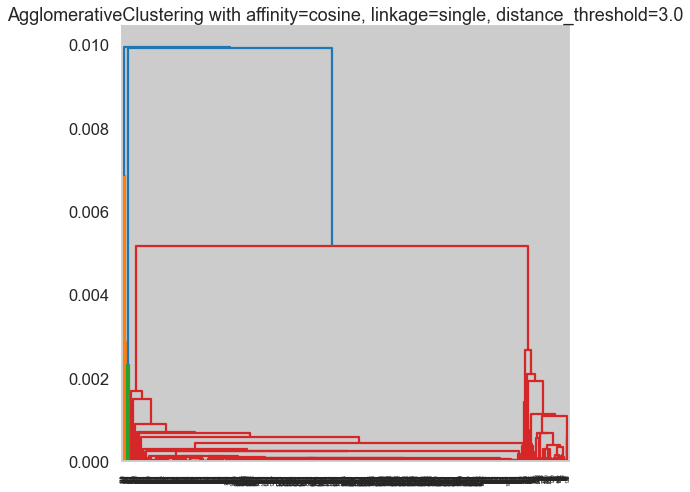

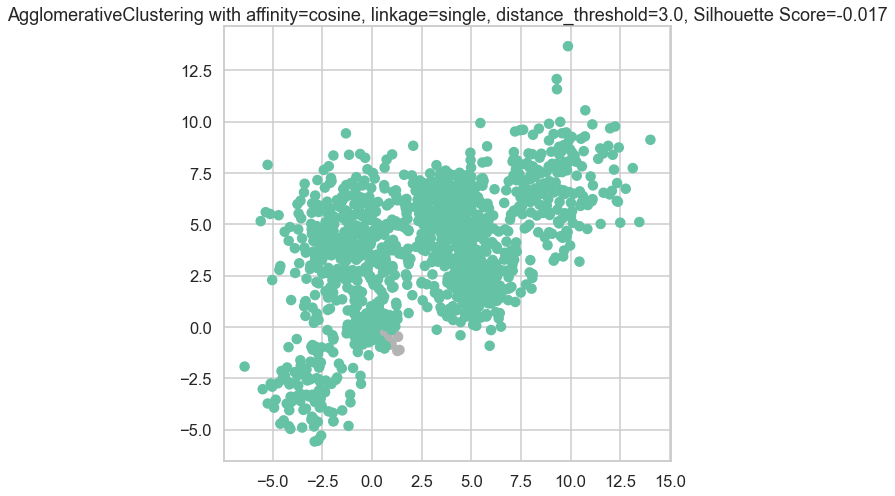

In [9]:


# Create lists of different parameter values to try
affinities = ['euclidean','cosine']
linkages = ['average', 'single']
distance_thresholds = [1.0, 2.0, 3.0]

# Initialize an empty list to store the silhouette scores for each parameter combination
silhouette_scores = []

# Loop over the different parameter combinations
for affinity in affinities:
    for linkage_type in linkages:
        for threshold in distance_thresholds:
            # Initialize AgglomerativeClustering with the current parameter values
            clustering = AgglomerativeClustering(n_clusters=2, affinity=affinity, linkage=linkage_type, distance_threshold=None)
            
            # Fit AgglomerativeClustering to the data and calculate the silhouette score
            clustering.fit(Multi_blob_Data)
            score = silhouette_score(Multi_blob_Data, clustering.labels_)
            silhouette_scores.append(score)
            
            # Plot the dendrogram for the current parameter values
            plt.figure()
            plt.title("AgglomerativeClustering with affinity={}, linkage={}, distance_threshold={}".format(affinity, linkage_type, threshold))
            dendrogram(linkage(Multi_blob_Data, method=linkage_type, metric=affinity))
            plt.show()
            
            # Plot the clustering results for the current parameter values
            plt.figure()
            plt.title("AgglomerativeClustering with affinity={}, linkage={}, distance_threshold={}, Silhouette Score={:.3f}".format(affinity, linkage_type, threshold, score))
            plt.scatter(Multi_blob_Data[:,0], Multi_blob_Data[:,1], c=clustering.labels_, cmap="Set2")
            plt.show()


In [10]:
best_idx = np.argmax(silhouette_scores)
best_affinity = affinities[best_idx // (len(linkages) * len(distance_thresholds))]
best_linkage = linkages[(best_idx // len(distance_thresholds)) % len(linkages)]
best_threshold = distance_thresholds[best_idx % len(distance_thresholds)]
best_score = silhouette_scores[best_idx]

print("Best parameters: affinity={}, linkage={}, distance_threshold={}".format(best_affinity, best_linkage, best_threshold))
print("Best silhouette score: {:.3f}".format(best_score))


Best parameters: affinity=euclidean, linkage=average, distance_threshold=1.0
Best silhouette score: 0.472


### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

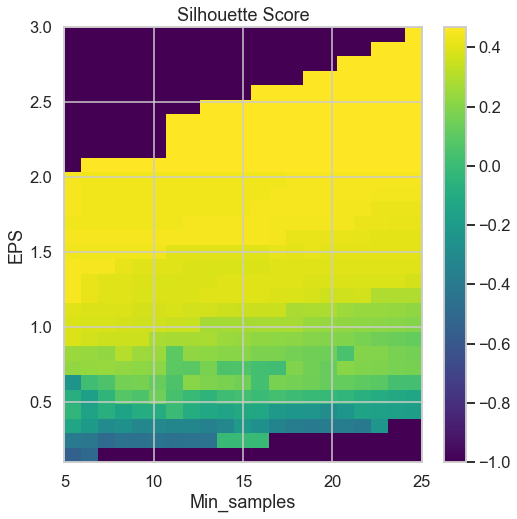

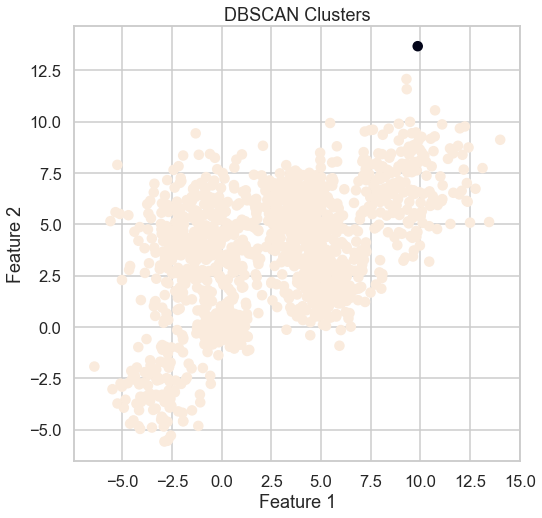

Best parameters: eps=2.0999999999999996, min_samples=6
Best silhouette score: 0.4685207355522043


In [11]:

# Define range of parameter values to test
eps_range = np.linspace(0.1, 3, 30)
min_samples_range = range(5, 26)

# Initialize variables to store best parameters and silhouette score
best_eps = None
best_min_samples = None
best_silhouette_score = -1

# Loop over parameter values and compute silhouette scores
silhouette_scores = []
for eps in eps_range:
    row_scores = []
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(Multi_blob_Data)
        if len(set(labels)) > 1:
            score = silhouette_score(Multi_blob_Data, labels)
        else:
            score = -1
        row_scores.append(score)
        if score > best_silhouette_score:
            best_silhouette_score = score
            best_eps = eps
            best_min_samples = min_samples
    silhouette_scores.append(row_scores)

# Plot silhouette scores
plt.imshow(silhouette_scores, cmap='viridis', origin='lower', extent=[min_samples_range[0], min_samples_range[-1], eps_range[0], eps_range[-1]], aspect='auto')
plt.colorbar()
plt.xlabel('Min_samples')
plt.ylabel('EPS')
plt.title('Silhouette Score')
plt.show()

# Compute DBSCAN with best parameters and plot resulting clusters
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
labels = dbscan.fit_predict(Multi_blob_Data)
plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clusters')
plt.show()

# Print best parameters and silhouette score
print('Best parameters: eps={}, min_samples={}'.format(best_eps, best_min_samples))
print('Best silhouette score: {}'.format(best_silhouette_score))


### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

In [12]:

covariance_types = ['full', 'tied', 'diag', 'spherical']

best_score = -np.inf
best_gmm = None

for cov_type in covariance_types:
    gmm = GaussianMixture(n_components=6, covariance_type=cov_type)
    gmm.fit(Multi_blob_Data)
    score = gmm.score(Multi_blob_Data)
    if score > best_score:
        best_score = score
        best_gmm = gmm

print(f"Best log-likelihood score: {best_score:.3f} with covariance_type={best_gmm.covariance_type}")


Best log-likelihood score: -4.769 with covariance_type=full


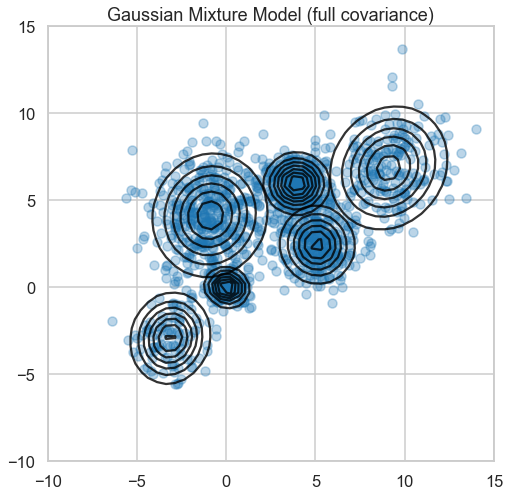

In [13]:
def plot_gmm(gmm, X):
    x, y = np.meshgrid(np.linspace(-10, 15), np.linspace(-10, 15))
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x
    pos[:, :, 1] = y
    fig, ax = plt.subplots(figsize=(8,8))
    ax.scatter(X[:, 0], X[:, 1], alpha=0.3)
    ax.set_xlim([-10, 15])
    ax.set_ylim([-10, 15])
    for i in range(gmm.n_components):
        covariances = gmm.covariances_
        if gmm.covariance_type == 'spherical':
            covariances = np.eye(2) * covariances[i]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_
        elif gmm.covariance_type == 'diag':
            covariances = np.eye(2) * covariances[i]
        else:
            covariances = covariances[i]
        rv = multivariate_normal(mean=gmm.means_[i], cov=covariances)
        ax.contour(x, y, rv.pdf(pos), colors='black', alpha=0.8)
    plt.title(f"Gaussian Mixture Model ({gmm.covariance_type} covariance)")
    plt.show()

plot_gmm(best_gmm, Multi_blob_Data)


In [14]:
# We perfrom data preperation and normalization then the above steps again #

In [15]:
df = pd.DataFrame(data=Multi_blob_Data, columns=['feature1', 'feature2'])


In [16]:
scaler = StandardScaler()
X = scaler.fit_transform(df)


K-Means silhouette score: 0.486


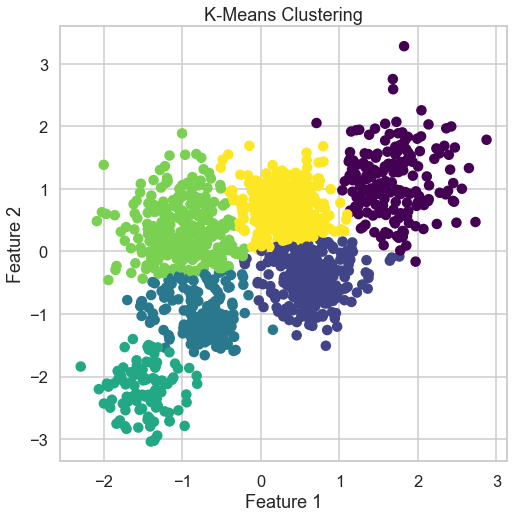

Agglomerative clustering silhouette score: 0.465


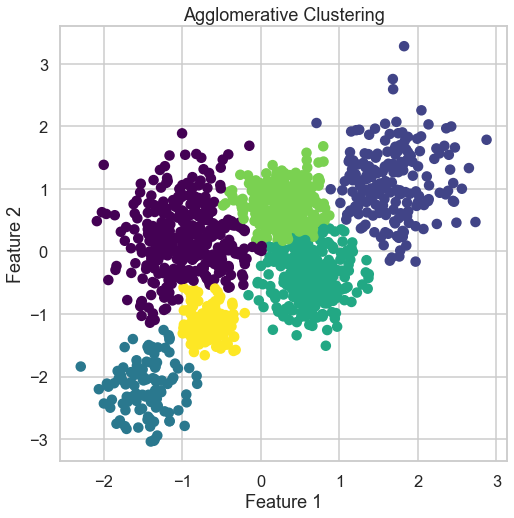

DBSCAN silhouette score: 0.451


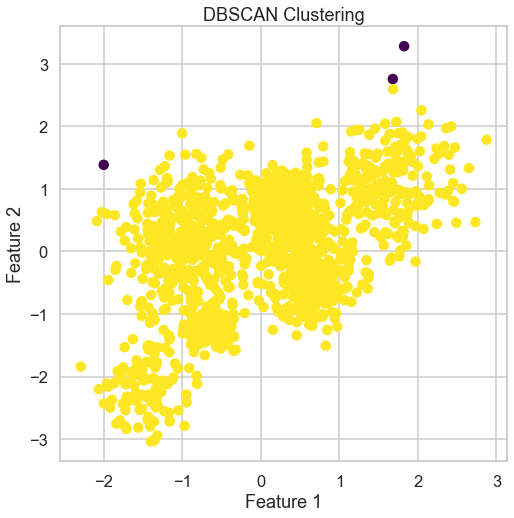

GMM silhouette score: 0.446


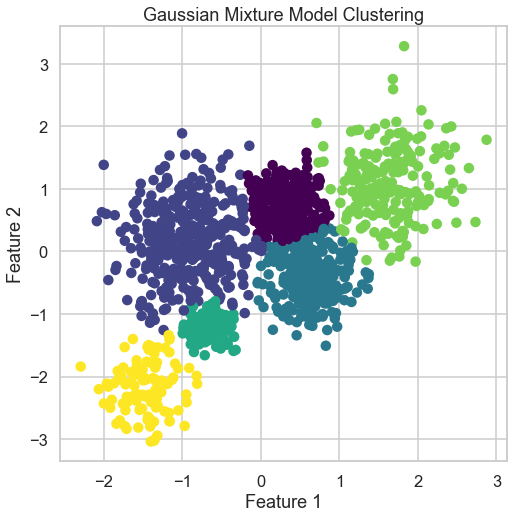

In [17]:

# K-Means clustering
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
kmeans_score = silhouette_score(X, kmeans_labels)
print(f"K-Means silhouette score: {kmeans_score:.3f}")


# K-Means clustering plot
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=6)
agg_labels = agg.fit_predict(X)
agg_score = silhouette_score(X, agg_labels)
print(f"Agglomerative clustering silhouette score: {agg_score:.3f}")


# Agglomerative Clustering plot
plt.scatter(X[:, 0], X[:, 1], c=agg_labels, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)
dbscan_score = silhouette_score(X, dbscan_labels)
print(f"DBSCAN silhouette score: {dbscan_score:.3f}")


# DBSCAN clustering plot
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Gaussian Mixture Model
gmm = GaussianMixture(n_components=6, random_state=42)
gmm.fit(X)
gmm_labels = gmm.predict(X)
gmm_score = silhouette_score(X, gmm_labels)
print(f"GMM silhouette score: {gmm_score:.3f}")


# GMM clustering plot
plt.scatter(X[:, 0], X[:, 1], c=gmm_labels, cmap='viridis')
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


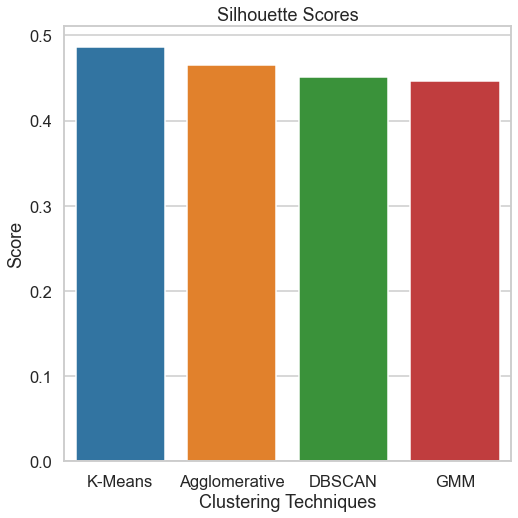

In [18]:
# Silhouette scores plot
scores = [kmeans_score, agg_score, dbscan_score, gmm_score]
labels = ['K-Means', 'Agglomerative', 'DBSCAN', 'GMM']
sns.barplot(x=labels, y=scores)
plt.title('Silhouette Scores')
plt.xlabel('Clustering Techniques')
plt.ylabel('Score')
plt.show()

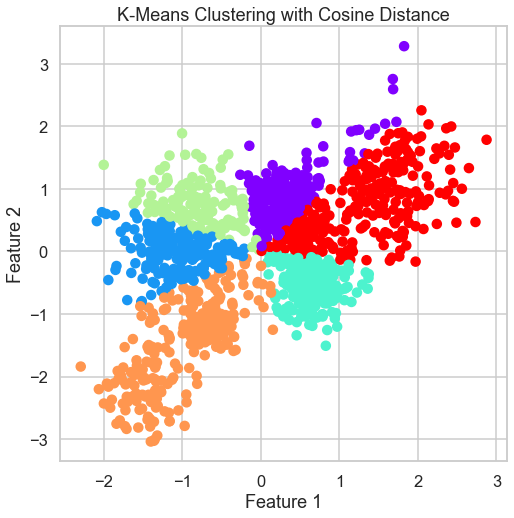

Silhouette Score: 0.5905962843510655


In [19]:

X_cosine = cosine_similarity(X)

# K-Means clustering with Cosine distance
kmeans_cosine = KMeans(n_clusters=6, random_state=42)
kmeans_cosine_labels = kmeans_cosine.fit_predict(X_cosine)
kmeans_cosine_score = silhouette_score(X_cosine, kmeans_cosine_labels)


# Plot the data points with color-coded clusters
plt.scatter(X[:, 0], X[:, 1], c=kmeans_cosine_labels, cmap='rainbow')
plt.title('K-Means Clustering with Cosine Distance')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Calculate silhouette score
kmeans_cosine_score = silhouette_score(X_cosine, kmeans_cosine_labels)
print('Silhouette Score:', kmeans_cosine_score)


## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [20]:

iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

In [21]:

iris_data = load_iris()

X = iris_data.data
y = iris_data.target


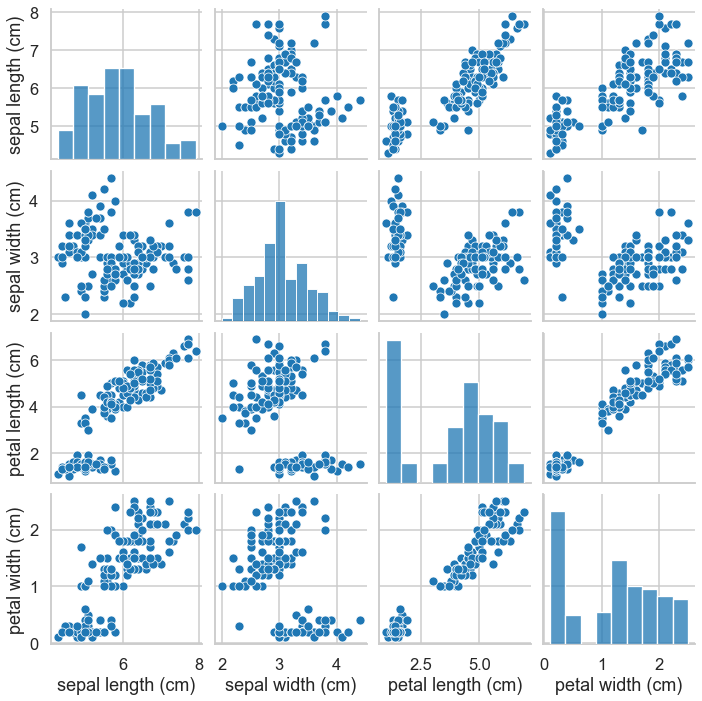

In [22]:


df = pd.DataFrame(X, columns=iris_data.feature_names)
sns.pairplot(df)


<AxesSubplot:>

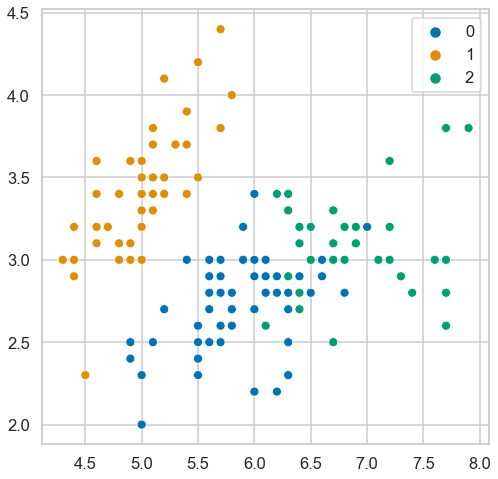

In [23]:

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

y_pred = kmeans.predict(X)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_pred, palette='colorblind')


<AxesSubplot:>

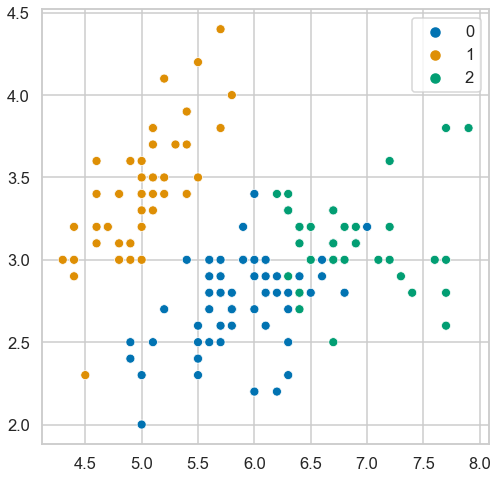

In [24]:

agg = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
agg.fit(X)

y_pred = agg.labels_

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_pred, palette='colorblind')


<AxesSubplot:>

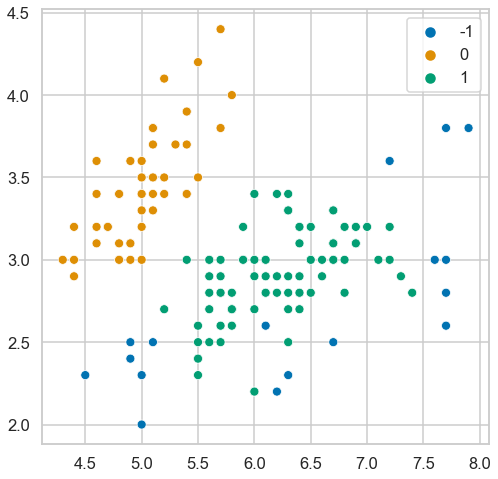

In [25]:

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

y_pred = dbscan.labels_

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_pred, palette='colorblind')


<AxesSubplot:>

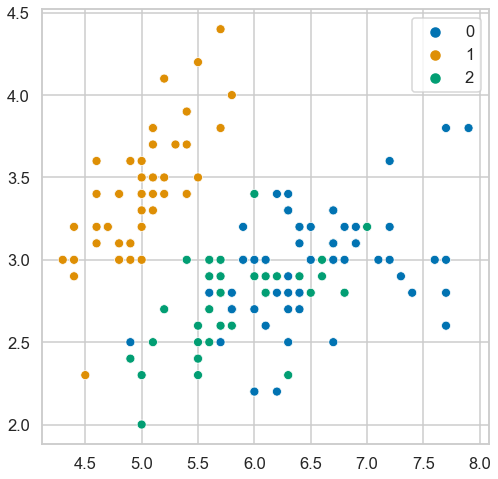

In [26]:

gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(X)

y_pred = gmm.predict(X)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_pred, palette='colorblind')


In [27]:
# We perform data preparation and data normalizatation then we repeat the above steps #

In [28]:
df = pd.DataFrame(data=np.c_[iris_data['data'], iris_data['target']], columns=iris_data['feature_names'] + ['target'])
df['target'] = df['target'].astype(int)
df.head()


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [29]:
df['target'].value_counts()


0    50
1    50
2    50
Name: target, dtype: int64

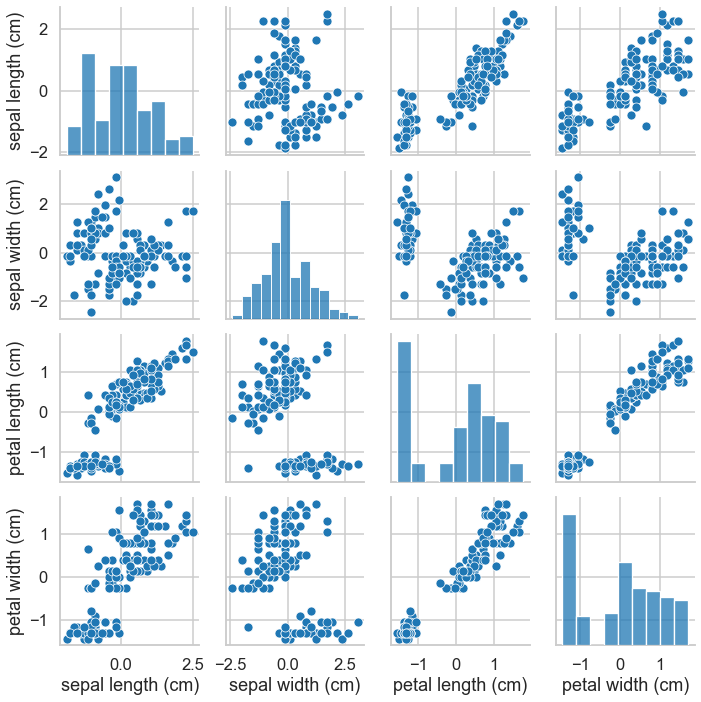

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('target', axis=1))
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_scaled.head()

sns.pairplot(pd.DataFrame(scaled_features, columns=df.columns[:-1]))



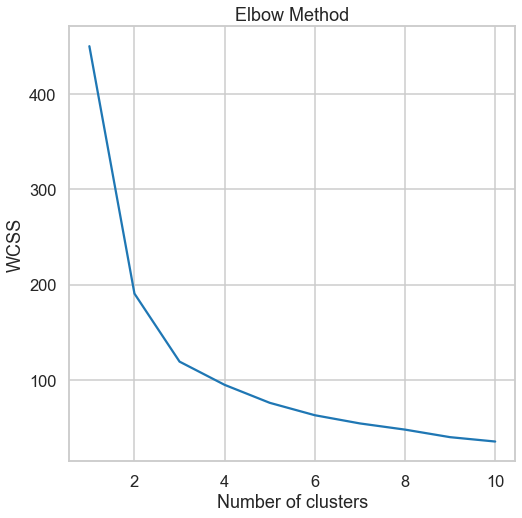

In [31]:


# Elbow method to determine optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled.iloc[:,:-1])
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



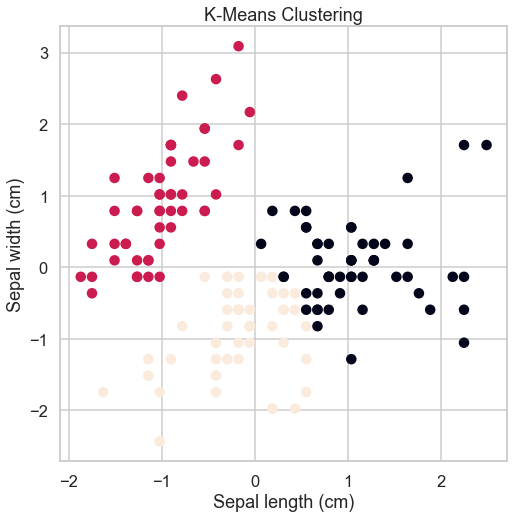

K-Means Silhouette Score: 0.45943185768025824


In [32]:
# K-Means clustering with three clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_labels = kmeans.fit_predict(df_scaled.iloc[:,:-1])
df_scaled['kmeans_label'] = kmeans_labels

# Plot clusters
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=kmeans_labels)
plt.title('K-Means Clustering')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.show()

# Silhouette score
kmeans_silhouette = silhouette_score(df_scaled.iloc[:,:-2], kmeans_labels)
print('K-Means Silhouette Score:', kmeans_silhouette)


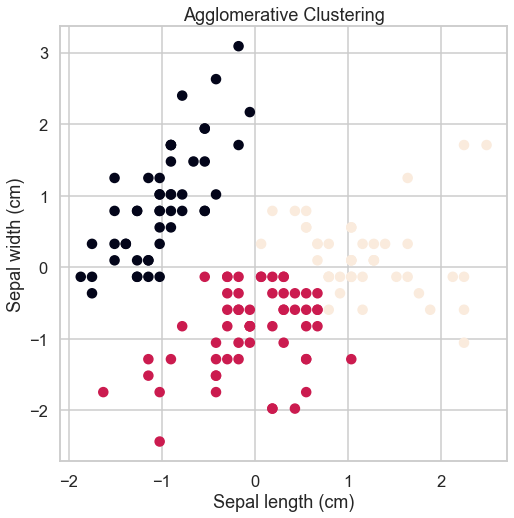

Agglomerative Clustering Silhouette Score: 0.4516474008761578


In [33]:

# Agglomerative Clustering with three clusters
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(df_scaled.iloc[:,:-2])
df_scaled['agg_label'] = agg_labels

# Plot clusters
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=agg_labels)
plt.title('Agglomerative Clustering')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.show()

# Silhouette score
agg_silhouette = silhouette_score(df_scaled.iloc[:,:-2], agg_labels)
print('Agglomerative Clustering Silhouette Score:', agg_silhouette)


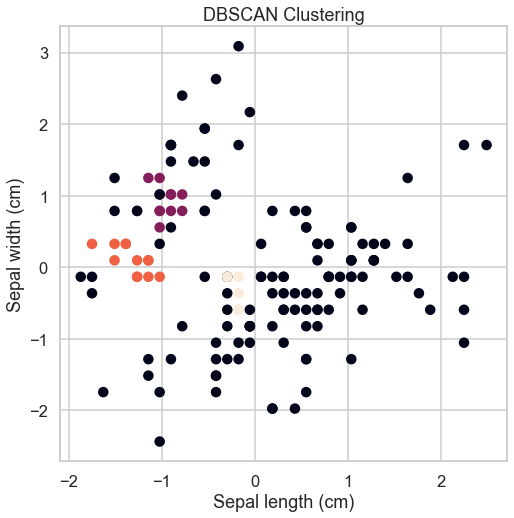

DBSCAN Clustering Silhouette Score: -0.13042500822712885


In [34]:
# DBSCAN clustering
dbscan_clustering = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan_clustering.fit_predict(df_scaled.iloc[:,:-2])
df_scaled['dbscan_label'] = dbscan_labels

# Plot clusters
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=dbscan_labels)
plt.title('DBSCAN Clustering')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.show()

# Silhouette score
dbscan_silhouette = silhouette_score(df_scaled.iloc[:,:-2], dbscan_labels)
print('DBSCAN Clustering Silhouette Score:', dbscan_silhouette)

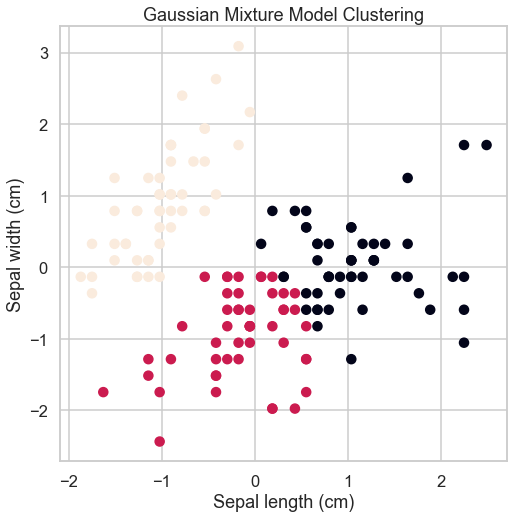

Gaussian Mixture Model Clustering Silhouette Score: 0.5994599654004827


In [35]:
# Gaussian Mixture Model clustering
gmm_clustering = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm_clustering.fit_predict(df_scaled.iloc[:,:-2])
df_scaled['gmm_label'] = gmm_labels

# Plot clusters
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=gmm_labels)
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.show()

# Silhouette score
gmm_silhouette = silhouette_score(df_scaled.iloc[:,:-2], gmm_labels)
print('Gaussian Mixture Model Clustering Silhouette Score:', gmm_silhouette)

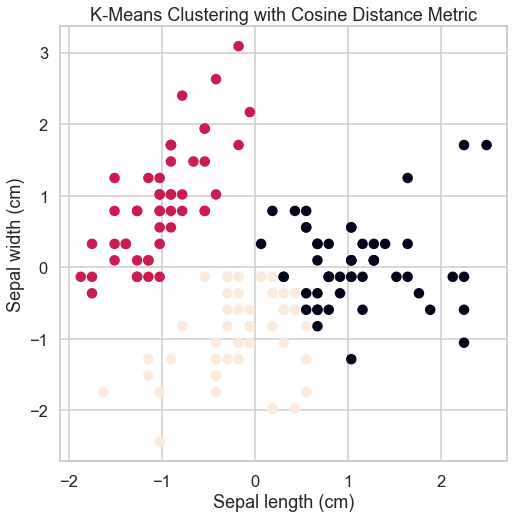

K-Means Clustering Silhouette Score with Cosine Distance Metric: 0.7657897753165355


In [36]:

# K-Means Clustering with cosine distance metric
kmeans_clustering_cosine = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans_clustering_cosine.fit(df_scaled.iloc[:,:-2])
kmeans_labels_cosine = kmeans_clustering_cosine.labels_
df_scaled['kmeans_label_cosine'] = kmeans_labels_cosine

# Plot clusters
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=kmeans_labels_cosine)
plt.title('K-Means Clustering with Cosine Distance Metric')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.show()

# Silhouette score
kmeans_silhouette_cosine = silhouette_score(df_scaled.iloc[:,:-2], kmeans_labels_cosine, metric='cosine')
print('K-Means Clustering Silhouette Score with Cosine Distance Metric:', kmeans_silhouette_cosine)


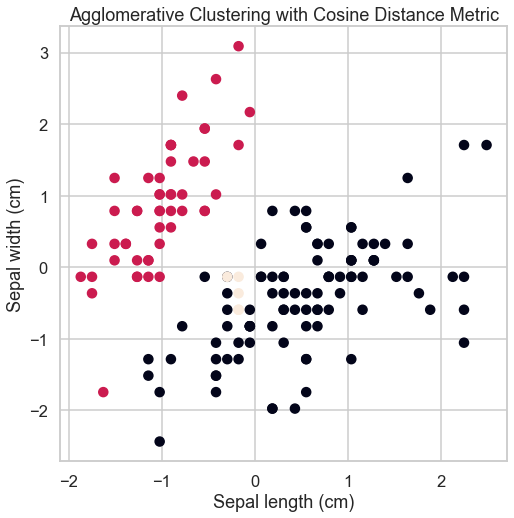

Agglomerative Clustering Silhouette Score with Cosine Distance Metric: 0.6160980743739215


In [37]:
# Agglomerative Clustering with cosine distance metric
agg_clustering_cosine = AgglomerativeClustering(n_clusters=3, affinity='cosine', linkage='average')
agg_labels_cosine = agg_clustering_cosine.fit_predict(df_scaled.iloc[:,:-2])
df_scaled['agg_label_cosine'] = agg_labels_cosine

# Plot clusters
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=agg_labels_cosine)
plt.title('Agglomerative Clustering with Cosine Distance Metric')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.show()

# Silhouette score
agg_silhouette_cosine = silhouette_score(df_scaled.iloc[:,:-2], agg_labels_cosine, metric='cosine')
print('Agglomerative Clustering Silhouette Score with Cosine Distance Metric:', agg_silhouette_cosine)


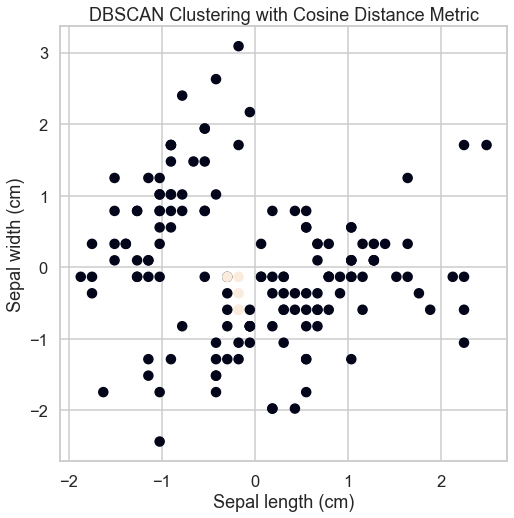

DBSCAN Clustering Silhouette Score with Cosine Distance Metric: 0.04660460127920334


In [38]:
# DBSCAN clustering with cosine distance metric
dbscan_clustering_cosine = DBSCAN(eps=0.3, min_samples=5, metric='cosine')
dbscan_labels_cosine = dbscan_clustering_cosine.fit_predict(df_scaled.iloc[:,:-2])
df_scaled['dbscan_label_cosine'] = dbscan_labels_cosine

# Plot clusters
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=dbscan_labels_cosine)
plt.title('DBSCAN Clustering with Cosine Distance Metric')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.show()

# Silhouette score
dbscan_silhouette_cosine = silhouette_score(df_scaled.iloc[:,:-2], dbscan_labels_cosine, metric='cosine')
print('DBSCAN Clustering Silhouette Score with Cosine Distance Metric:', dbscan_silhouette_cosine)
    

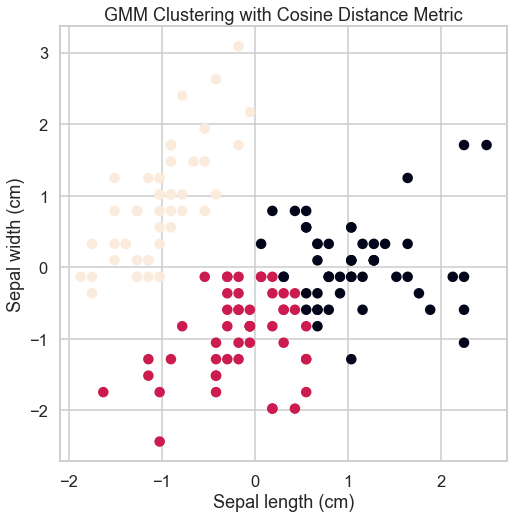

GMM Clustering Silhouette Score with Cosine Distance Metric: 0.8102993904754276


In [39]:
# Gaussian Mixture Model clustering with cosine distance metric
gmm_clustering_cosine = GaussianMixture(n_components=3, random_state=42, covariance_type='full')
gmm_clustering_cosine.fit(df_scaled.iloc[:,:-2])
gmm_labels_cosine = gmm_clustering_cosine.predict(df_scaled.iloc[:,:-2])
df_scaled['gmm_label_cosine'] = gmm_labels_cosine

# Plot clusters
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=gmm_labels_cosine)
plt.title('GMM Clustering with Cosine Distance Metric')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.show()

# Silhouette score
gmm_silhouette_cosine = silhouette_score(df_scaled.iloc[:,:-2], gmm_labels_cosine, metric='cosine')
print('GMM Clustering Silhouette Score with Cosine Distance Metric:', gmm_silhouette_cosine)


## Customer dataset
Repeat all the above on the customer data set 

In [40]:
file_path = r"D:\GUC\Semester 10\Machine Learning\Assignments\3\Customer data.csv"
df = pd.read_csv(file_path)


In [41]:
df = pd.get_dummies(df, columns=['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size'], drop_first=True)

In [42]:
distortions = []
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    distortions.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df, kmeans.labels_))
    print("For k =", k, "Silhouette score is", silhouette_scores[-1])


For k = 2 Silhouette score is 0.5828454749077369
For k = 3 Silhouette score is 0.5103254254674223
For k = 4 Silhouette score is 0.541119772856174
For k = 5 Silhouette score is 0.5379399050569561
For k = 6 Silhouette score is 0.5396088796479623
For k = 7 Silhouette score is 0.5247097351405559
For k = 8 Silhouette score is 0.5357114295352822
For k = 9 Silhouette score is 0.5270251303458908
For k = 10 Silhouette score is 0.5276377148371985


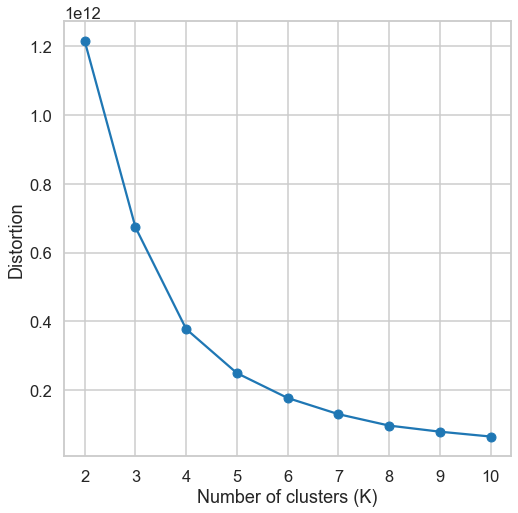

In [43]:
plt.plot(range(2, 11), distortions, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Distortion')
plt.show()


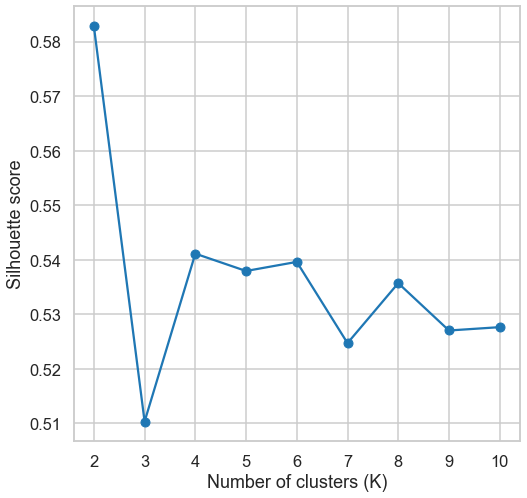

In [44]:
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette score')
plt.show()


In [45]:
best_k = np.argmax(silhouette_scores) + 2
best_silhouette_score = silhouette_scores[best_k - 2]
print("Best value of K =", best_k)
print("Silhouette score for best K =", best_silhouette_score)


Best value of K = 2
Silhouette score for best K = 0.5828454749077369


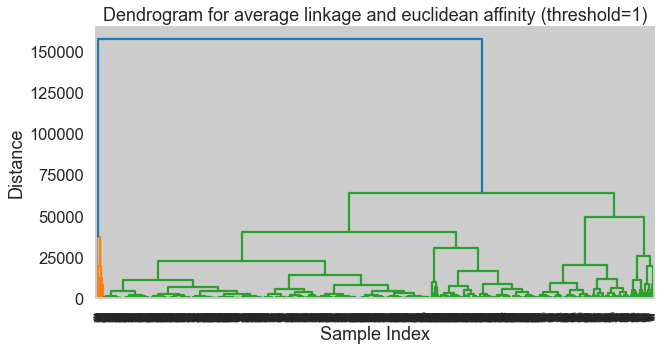

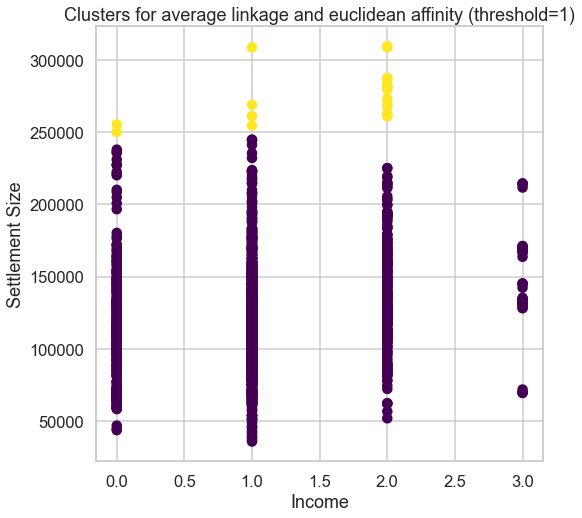

Silhouette score for average linkage and euclidean affinity (threshold=1): 0.729


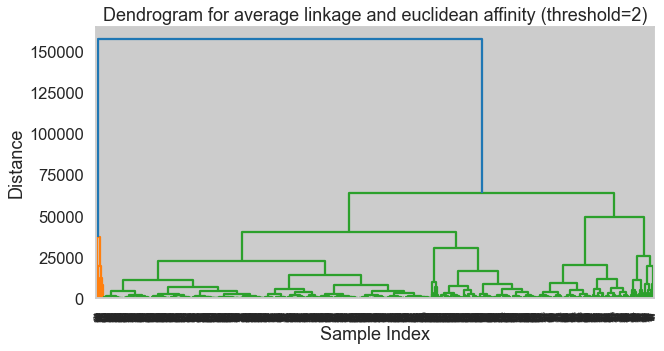

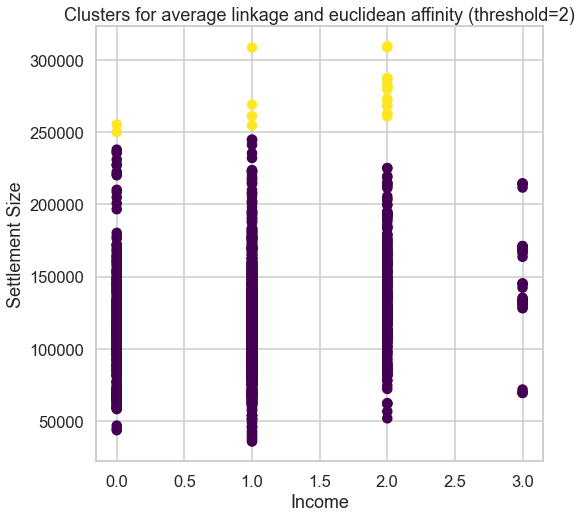

Silhouette score for average linkage and euclidean affinity (threshold=2): 0.729


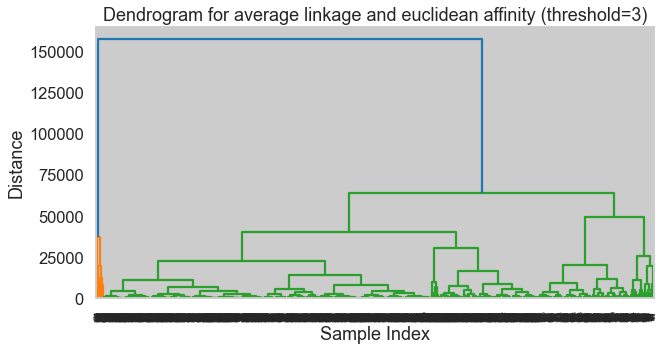

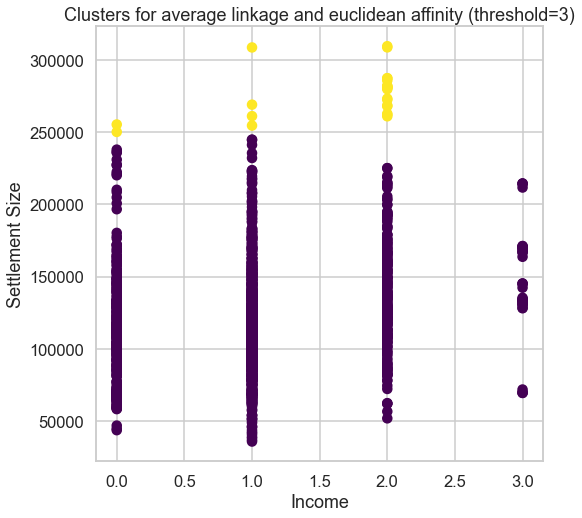

Silhouette score for average linkage and euclidean affinity (threshold=3): 0.729


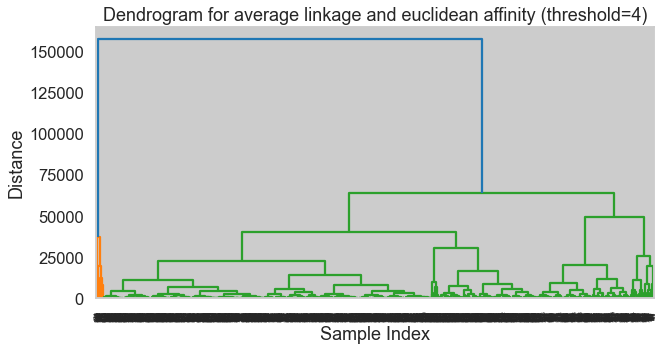

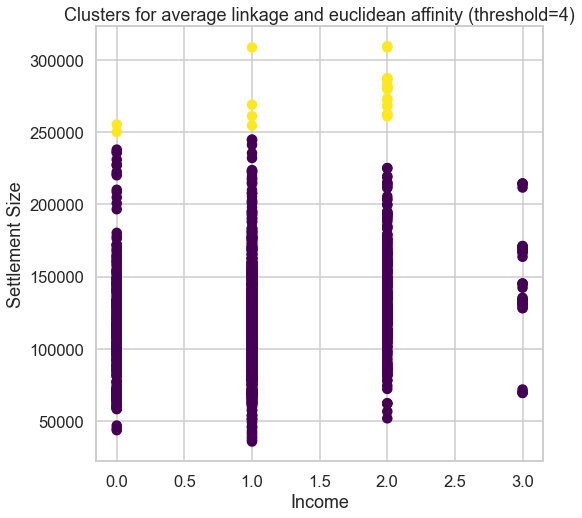

Silhouette score for average linkage and euclidean affinity (threshold=4): 0.729


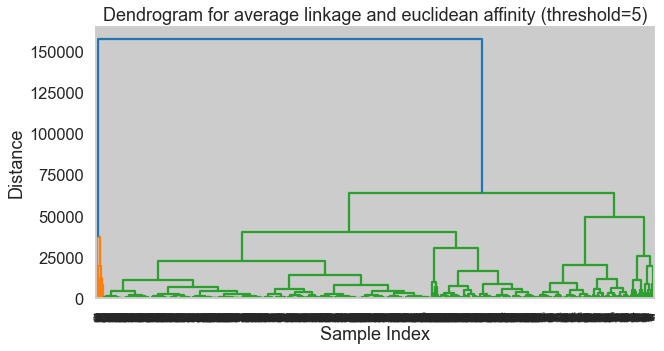

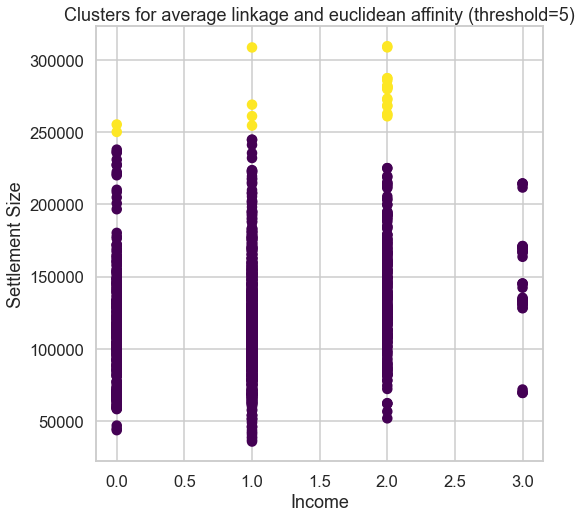

Silhouette score for average linkage and euclidean affinity (threshold=5): 0.729


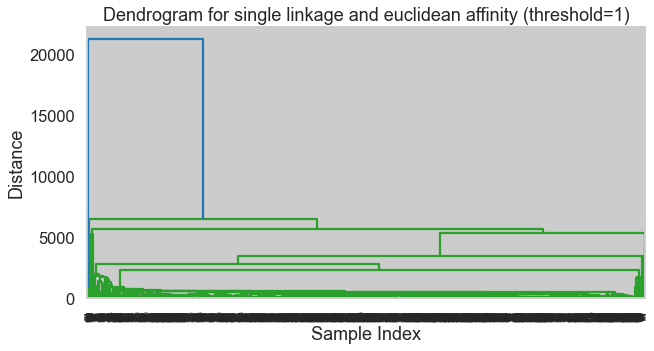

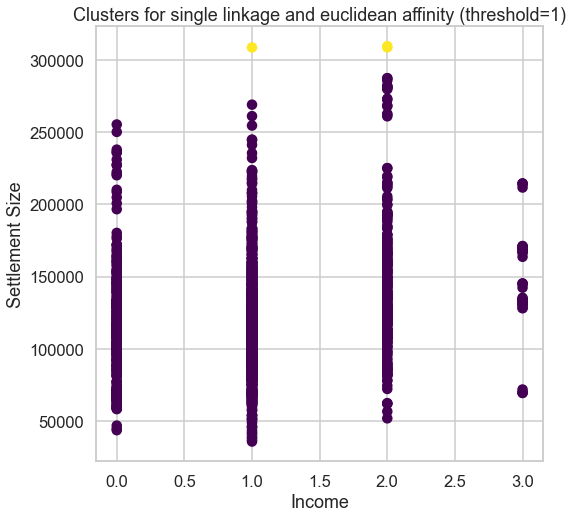

Silhouette score for single linkage and euclidean affinity (threshold=1): 0.759


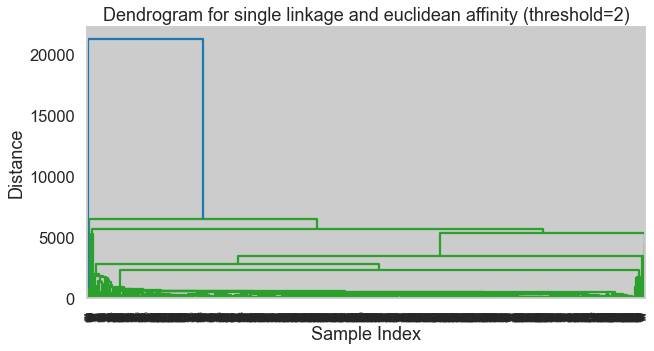

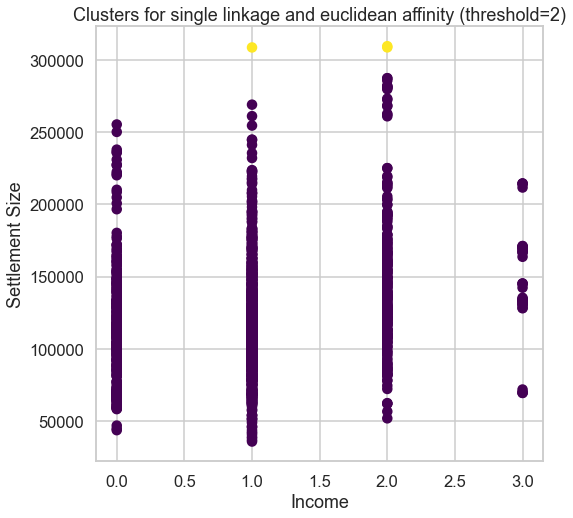

Silhouette score for single linkage and euclidean affinity (threshold=2): 0.759


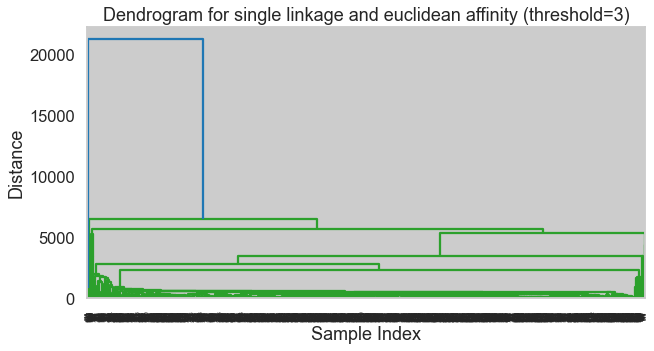

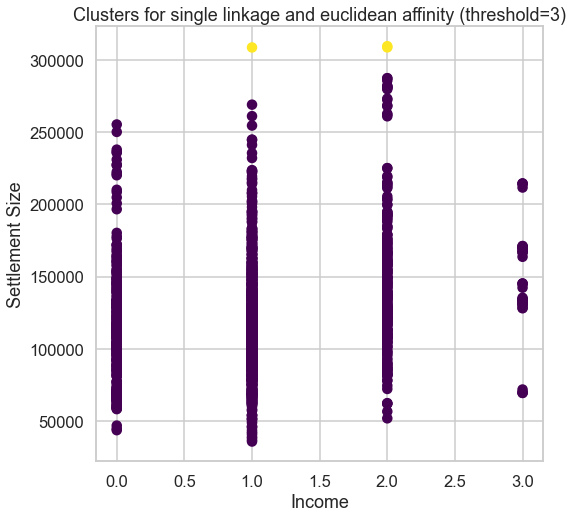

Silhouette score for single linkage and euclidean affinity (threshold=3): 0.759


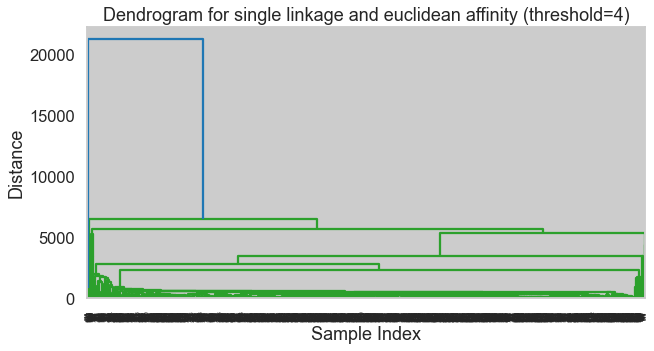

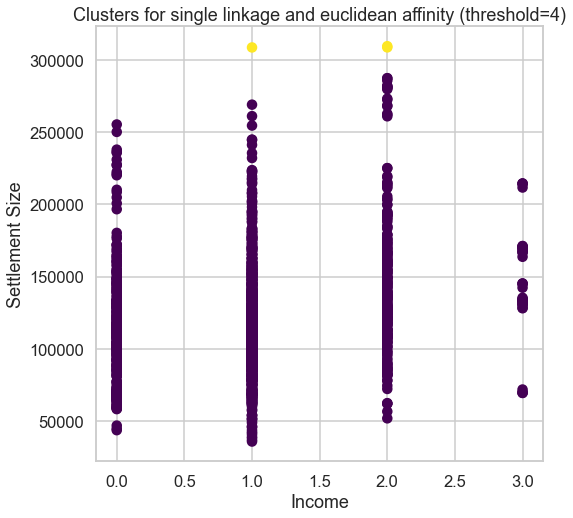

Silhouette score for single linkage and euclidean affinity (threshold=4): 0.759


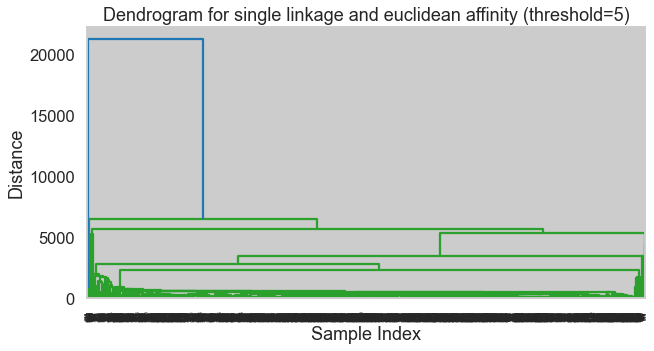

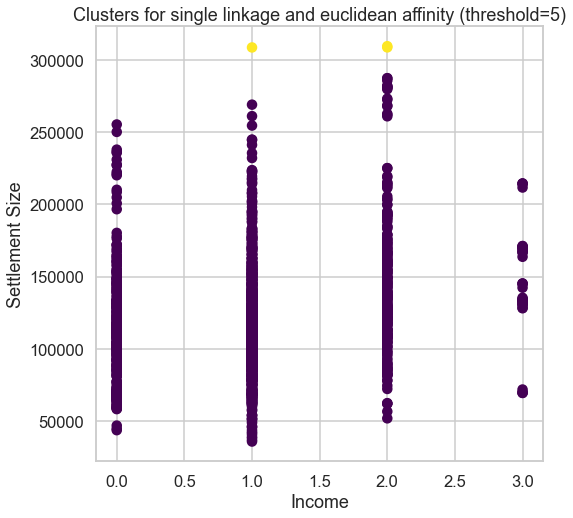

Silhouette score for single linkage and euclidean affinity (threshold=5): 0.759


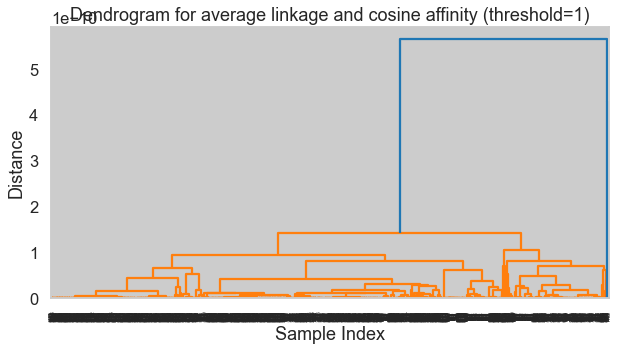

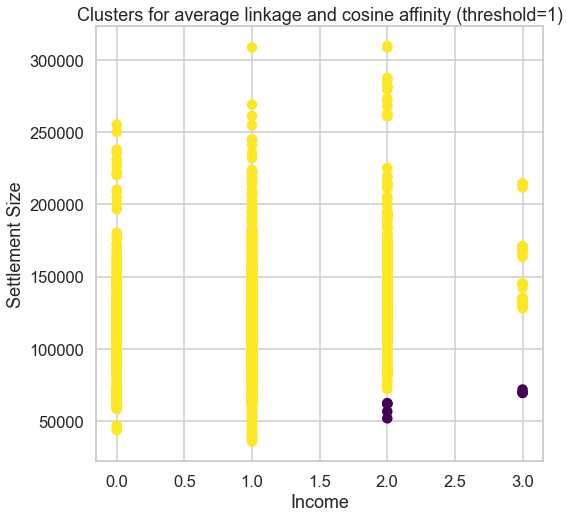

Silhouette score for average linkage and cosine affinity (threshold=1): 0.205


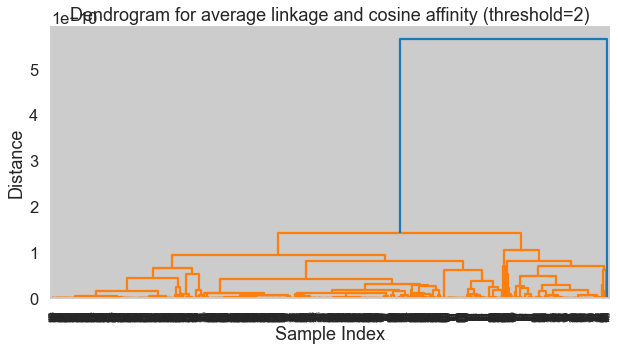

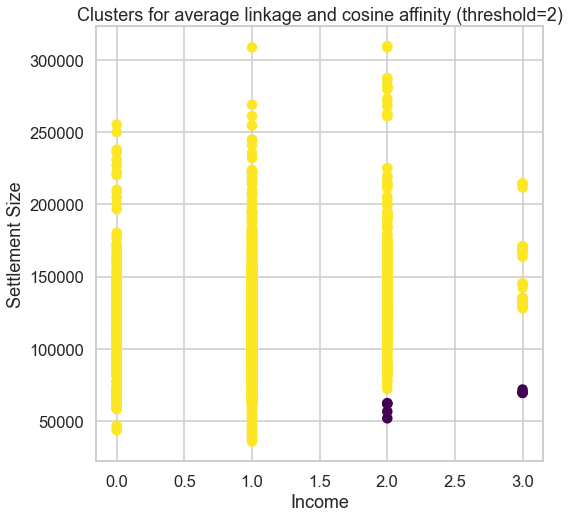

Silhouette score for average linkage and cosine affinity (threshold=2): 0.205


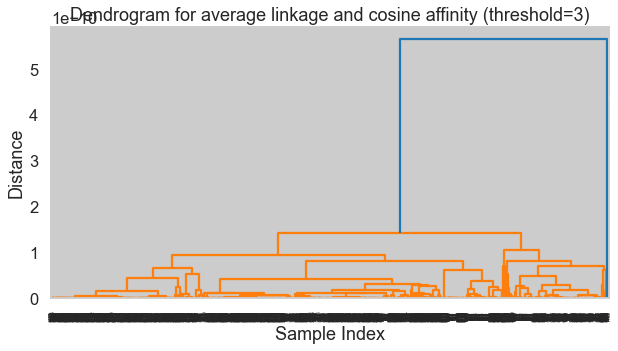

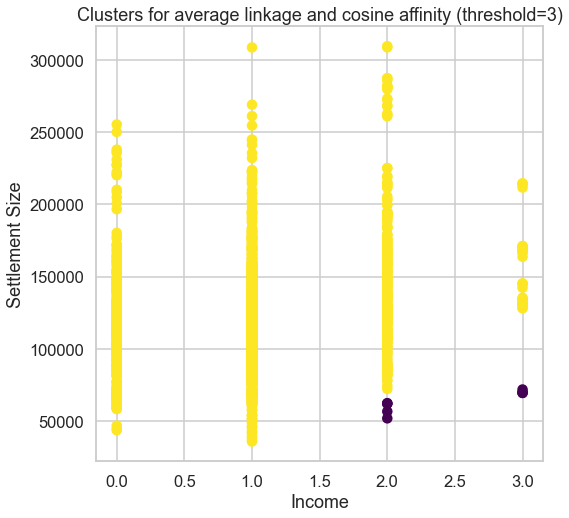

Silhouette score for average linkage and cosine affinity (threshold=3): 0.205


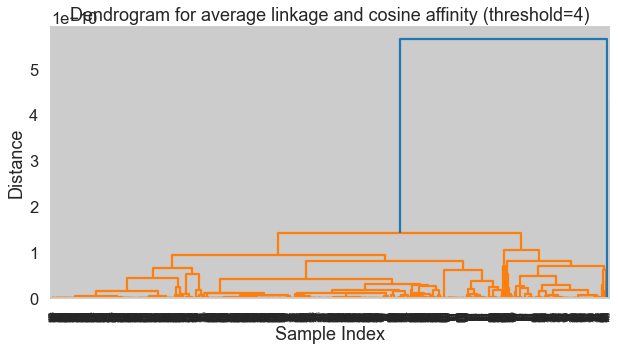

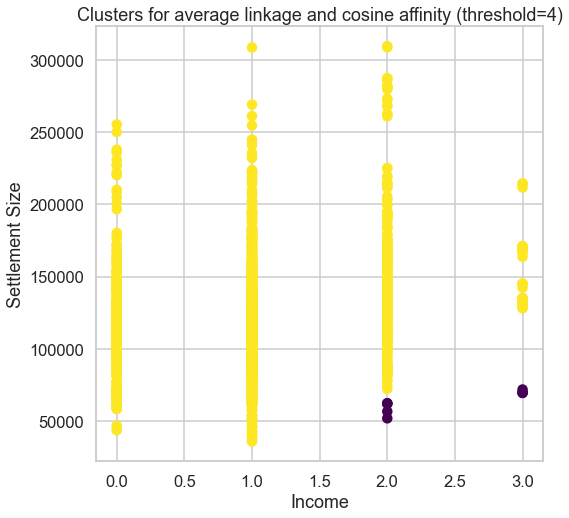

Silhouette score for average linkage and cosine affinity (threshold=4): 0.205


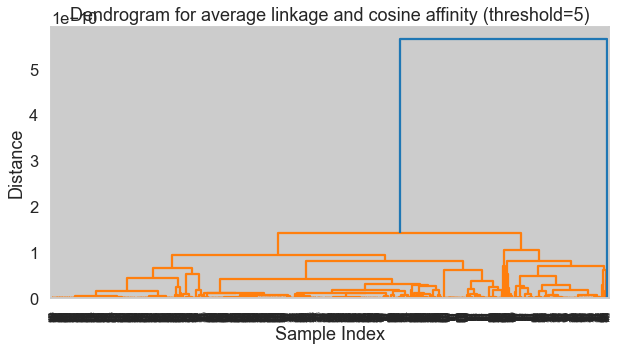

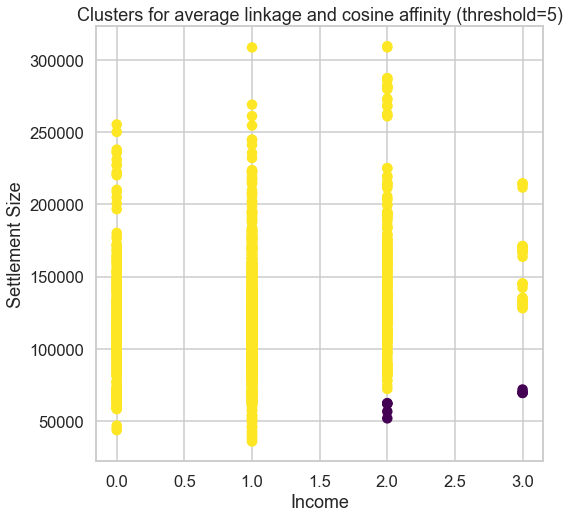

Silhouette score for average linkage and cosine affinity (threshold=5): 0.205


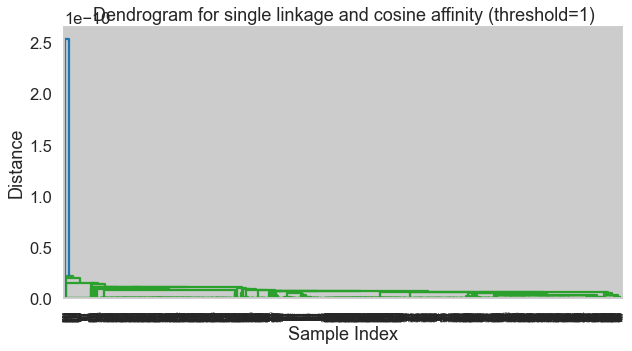

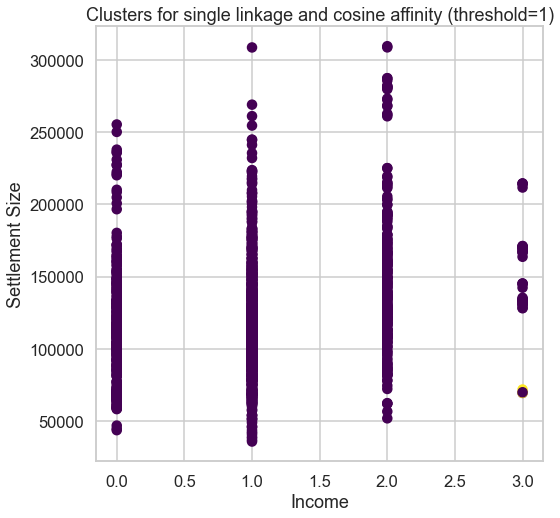

Silhouette score for single linkage and cosine affinity (threshold=1): 0.110


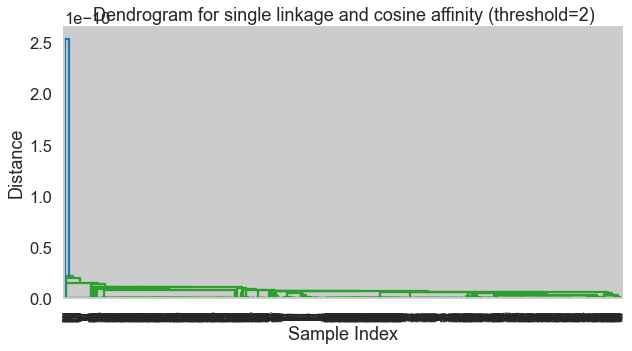

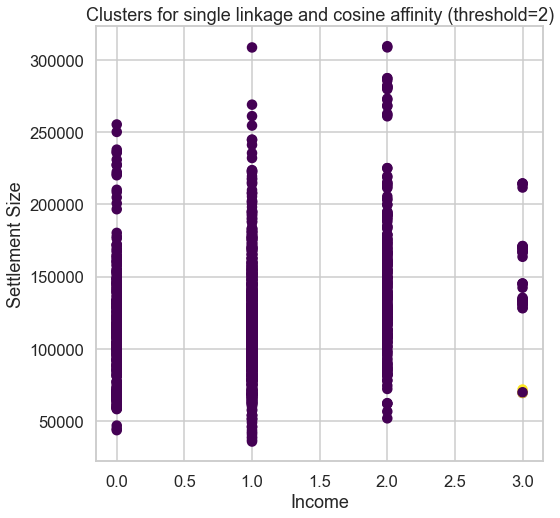

Silhouette score for single linkage and cosine affinity (threshold=2): 0.110


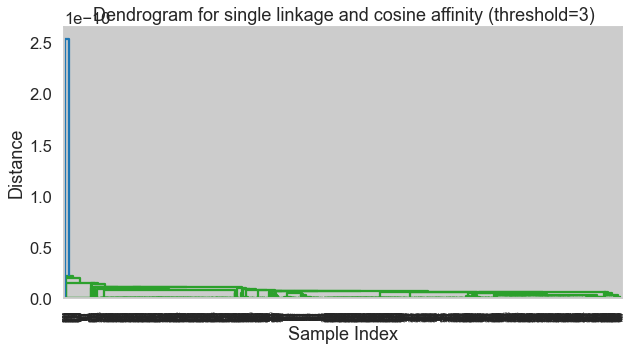

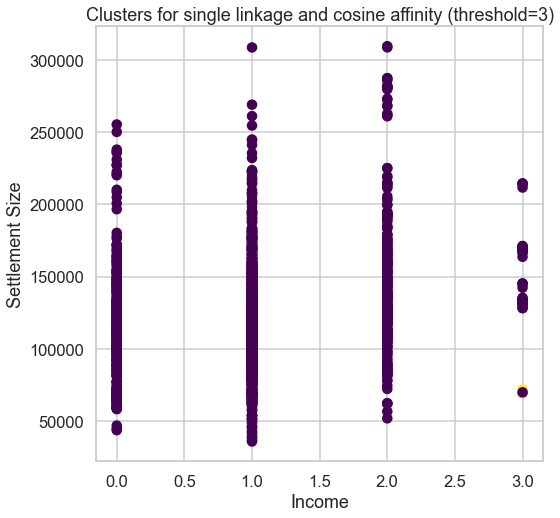

Silhouette score for single linkage and cosine affinity (threshold=3): 0.110


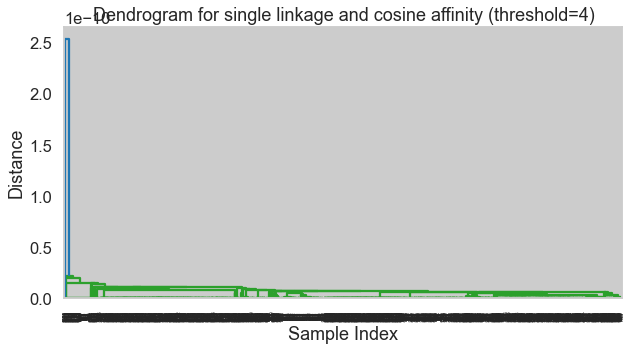

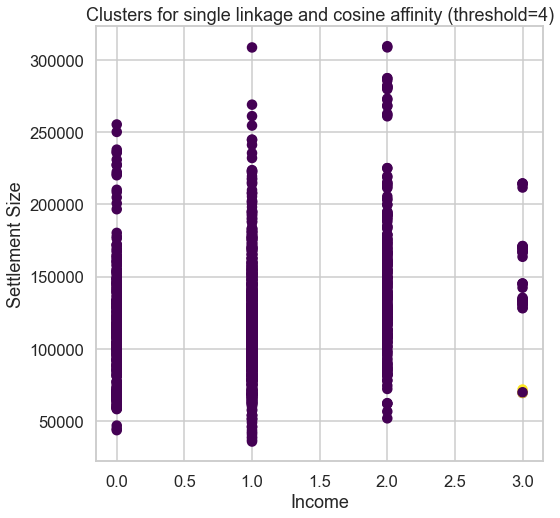

Silhouette score for single linkage and cosine affinity (threshold=4): 0.110


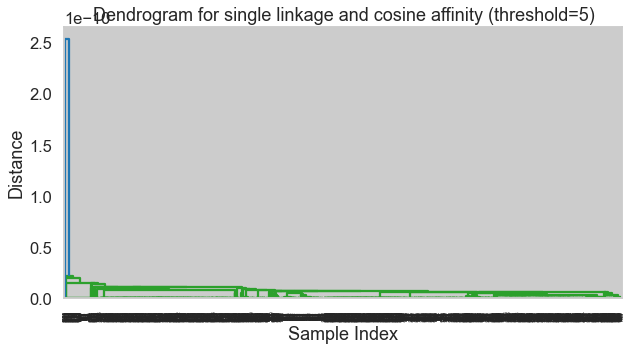

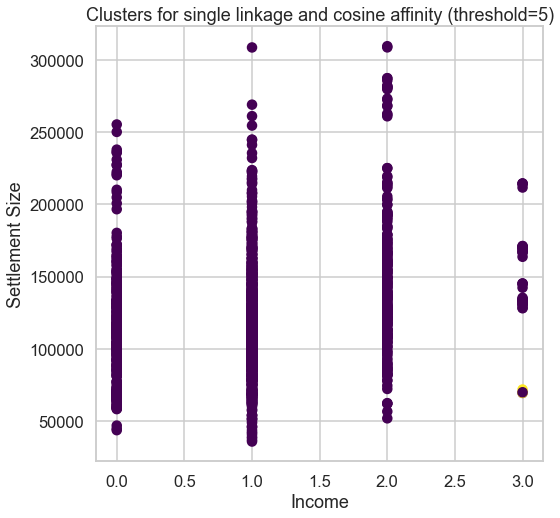

Silhouette score for single linkage and cosine affinity (threshold=5): 0.110
Best parameters: {'affinity': 'euclidean', 'linkage': 'single', 'distance_threshold': 1}
Best silhouette score: 0.759


In [46]:


file_path = r"D:\GUC\Semester 10\Machine Learning\Assignments\3\Customer data.csv"
df = pd.read_csv(file_path)
# Extract the features
X = df.iloc[:, 4:].values

# Define the parameter grids to search over
affinities = ['euclidean', 'cosine']
linkages = ['average', 'single']
distance_thresholds = [1, 2, 3, 4, 5]

# Initialize variables to store the best parameters and silhouette score
best_params = {}
best_score = -1

# Loop over parameter grids and find the best parameters and silhouette score
for affinity in affinities:
    for linkage_type in linkages:
        for distance_threshold in distance_thresholds:
            
            # Perform agglomerative clustering with the current parameters
            clustering = AgglomerativeClustering(n_clusters=2,
                                                  affinity=affinity,
                                                  linkage=linkage_type,
                                                  distance_threshold=None)
            clustering.fit(X)
            
            # Calculate the silhouette score for the current clustering
            score = silhouette_score(X, clustering.labels_)
            
            # Update the best score and parameters if the current score is higher
            if score > best_score:
                best_score = score
                best_params = {'affinity': affinity,
                               'linkage': linkage_type,
                               'distance_threshold': distance_threshold}
            
            # Plot the dendrogram for the current clustering
            linkage_matrix = linkage(X, method=linkage_type, metric=affinity)
            plt.figure(figsize=(10, 5))
            dendrogram(linkage_matrix)
            plt.title(f"Dendrogram for {linkage_type} linkage and {affinity} affinity (threshold={distance_threshold})")
            plt.xlabel("Sample Index")
            plt.ylabel("Distance")
            plt.show()
            
            # Display the resulting clusters
            plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_, cmap='viridis')
            plt.title(f"Clusters for {linkage_type} linkage and {affinity} affinity (threshold={distance_threshold})")
            plt.xlabel("Income")
            plt.ylabel("Settlement Size")
            plt.show()
            
            # Print the silhouette score for the current clustering
            print(f"Silhouette score for {linkage_type} linkage and {affinity} affinity (threshold={distance_threshold}): {score:.3f}")

# Print the best parameters and silhouette score
print(f"Best parameters: {best_params}")
print(f"Best silhouette score: {best_score:.3f}")


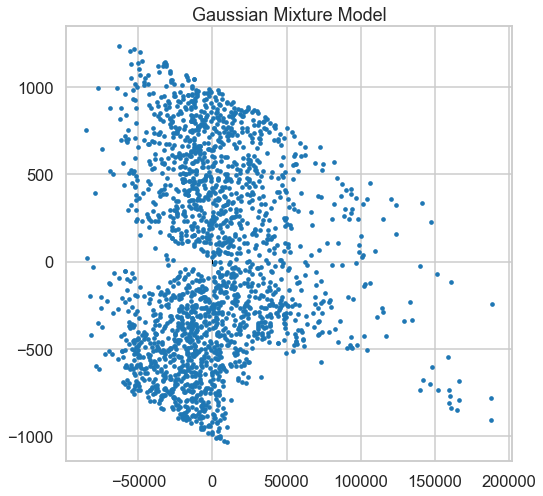

In [47]:


# load the data
data = pd.read_csv('Customer data.csv')

# apply PCA to reduce dimensionality to 2 features
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

# fit Gaussian mixture model with different covariance types
covariance_types = ['full', 'tied', 'diag', 'spherical']
gmm_scores = []
for cov_type in covariance_types:
    gmm = GaussianMixture(n_components=3, covariance_type=cov_type)
    gmm.fit(data_pca)
    gmm_scores.append(gmm.score(data_pca))

# plot the resulting distribution
plt.figure(figsize=(8, 8))
plt.scatter(data_pca[:, 0], data_pca[:, 1], s=10)
for i, cov_type in enumerate(covariance_types):
    x, y = np.meshgrid(np.linspace(-6, 10), np.linspace(-6, 10))
    XX = np.array([x.ravel(), y.ravel()]).T
    Z = -gmm_scores[i] * gmm.predict_proba(XX)[:, 0]
    Z = Z.reshape(x.shape)
    plt.contour(x, y, Z, levels=10, linewidths=1, colors='k', alpha=0.5)
    plt.contourf(x, y, Z, levels=10, cmap='RdBu_r', alpha=0.5)
    plt.title('Gaussian Mixture Model')
plt.show()


Best eps: 2.0
Best min_samples: 5
Best silhouette score: 0.40413907397275856


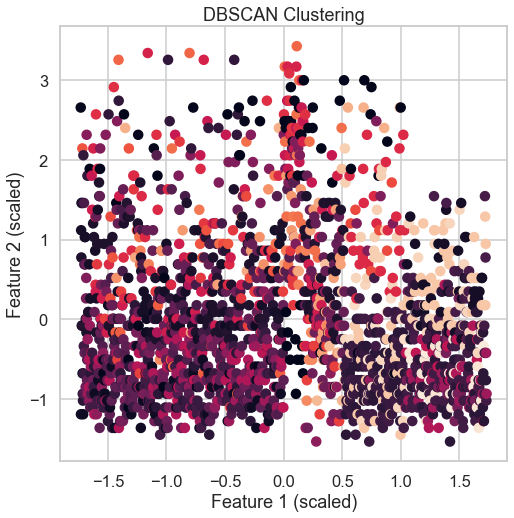

In [48]:


file_path = r"D:\GUC\Semester 10\Machine Learning\Assignments\3\Customer data.csv"
df = pd.read_csv(file_path)

df = pd.get_dummies(df, columns=['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size'], drop_first=True)
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Try different values of eps and min_samples
eps_values = [0.5, 1.0, 1.5, 2.0]
min_samples_values = [5, 10, 15, 20]

best_score = -1
best_eps = None
best_min_samples = None
best_labels = None

# Loop over all combinations of eps and min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        # Train DBSCAN model
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)

        # Compute silhouette score
        score = silhouette_score(X_scaled, labels)

        # Update best score and parameters if applicable
        if score > best_score:
            best_score = score
            best_eps = eps
            best_min_samples = min_samples
            best_labels = labels

# Print best parameters and score
print(f"Best eps: {best_eps}")
print(f"Best min_samples: {best_min_samples}")
print(f"Best silhouette score: {best_score}")

# Plot resulting clusters
import matplotlib.pyplot as plt

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=best_labels)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()
